In [103]:
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt

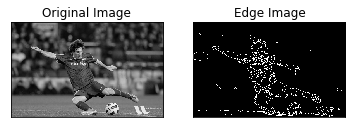

In [113]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('tests/messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [107]:
img = cv2.imread("tests/messi.jpg", 0)

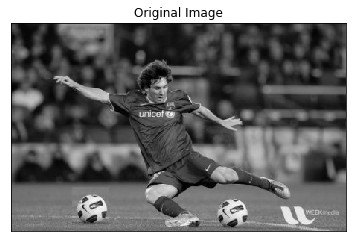

In [109]:
plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

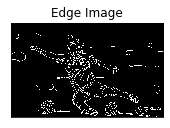

In [110]:
edges = cv.Canny(img,100,200)
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

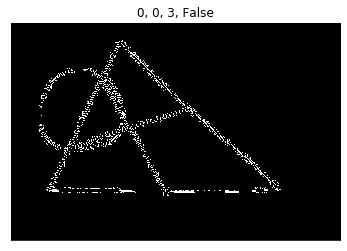

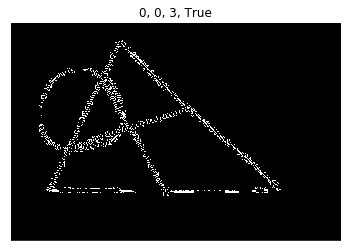

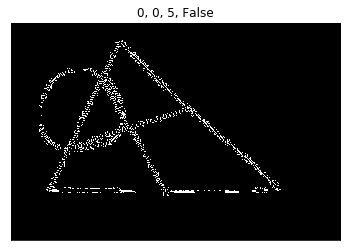

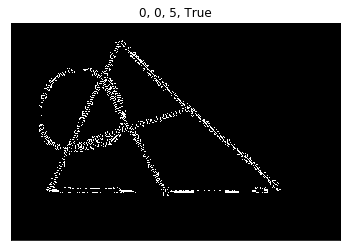

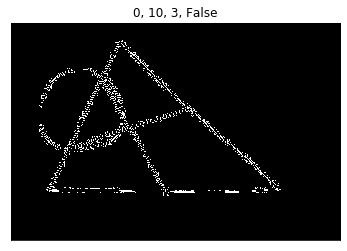

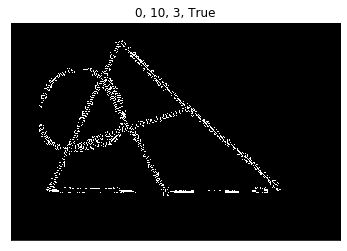

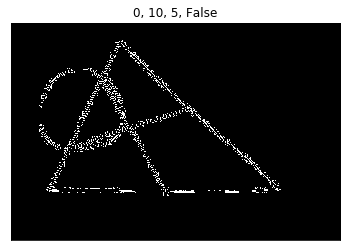

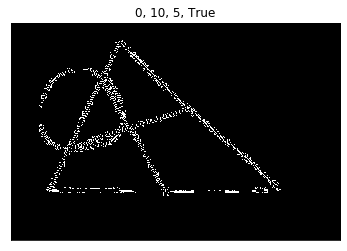

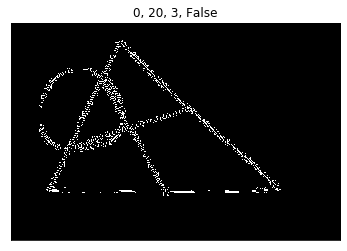

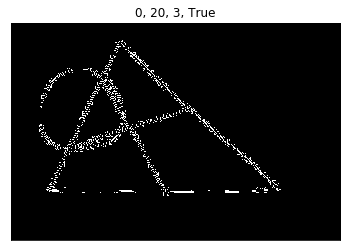

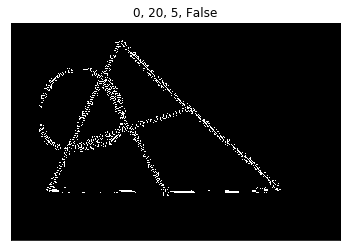

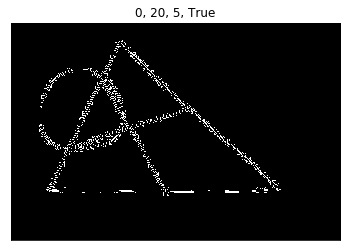

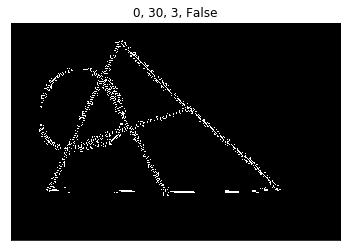

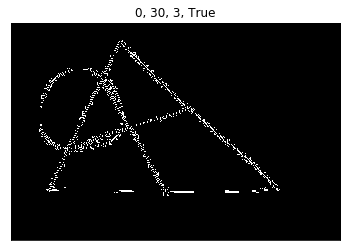

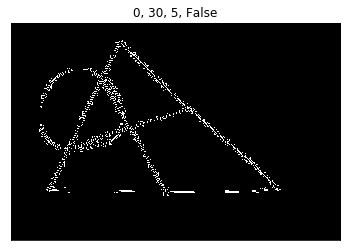

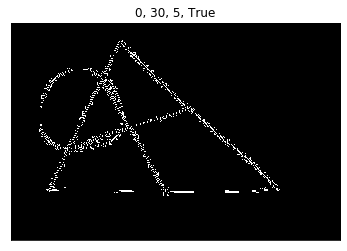

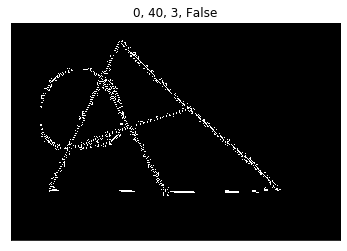

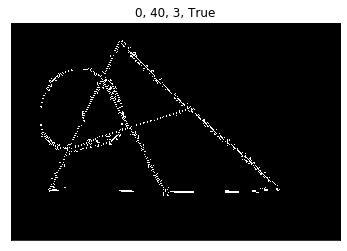

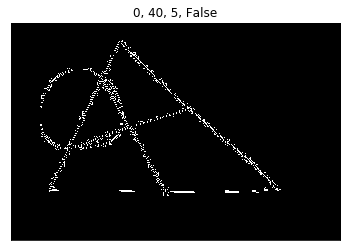

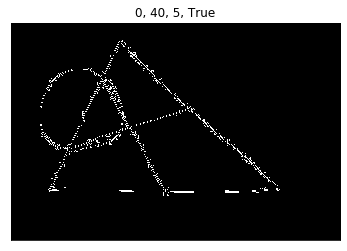

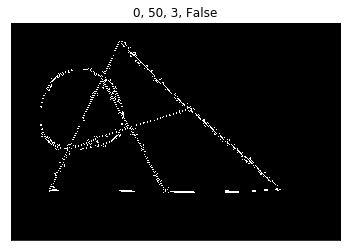

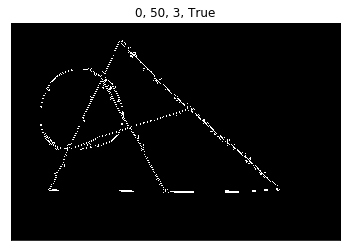

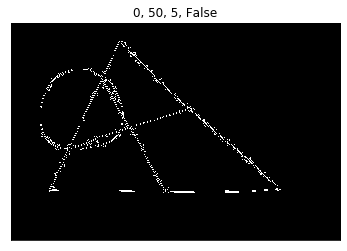

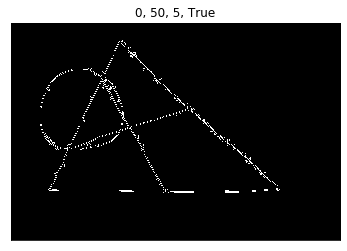

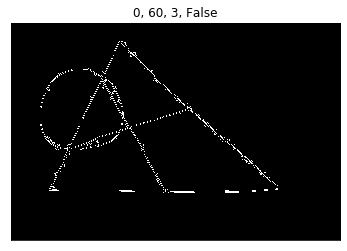

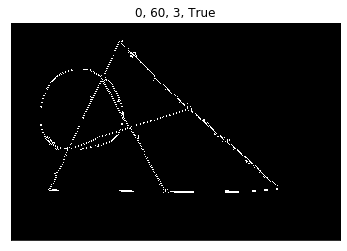

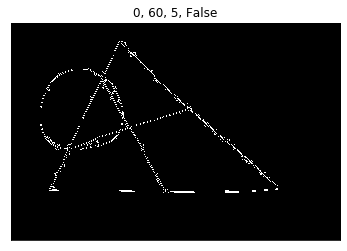

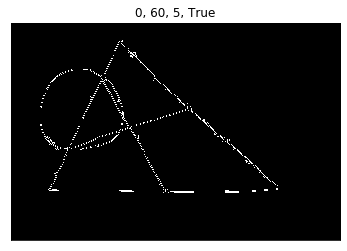

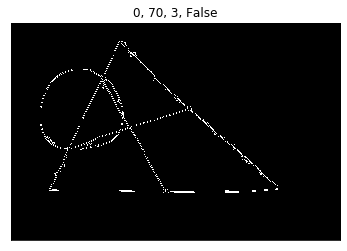

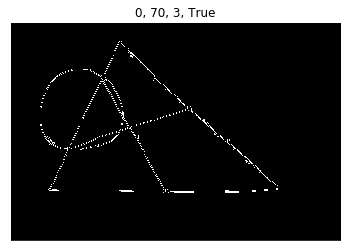

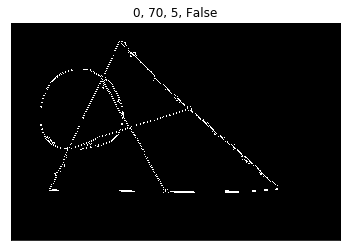

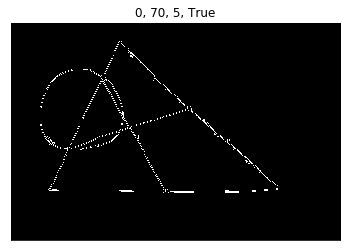

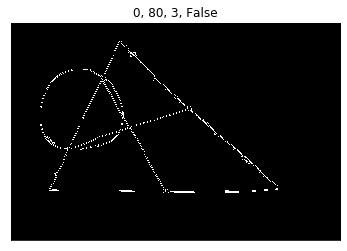

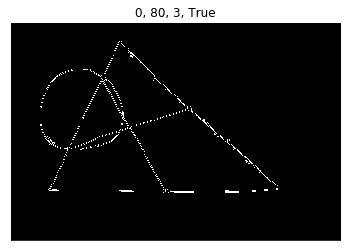

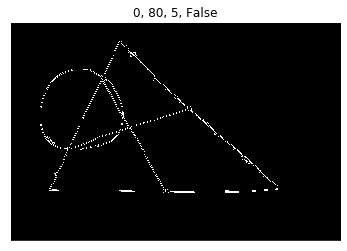

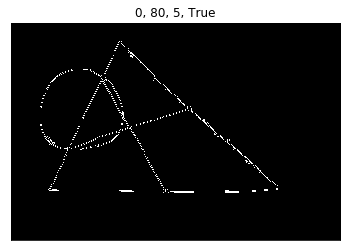

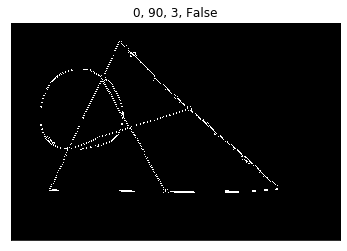

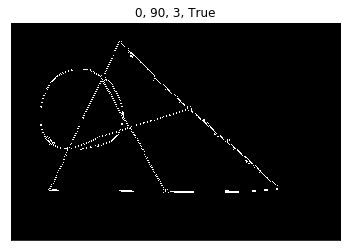

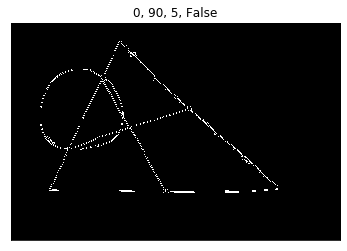

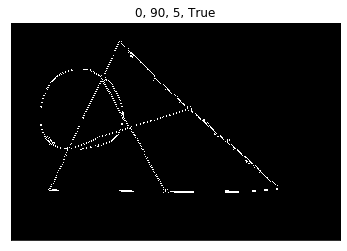

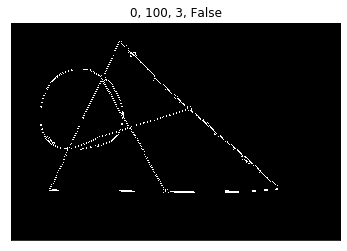

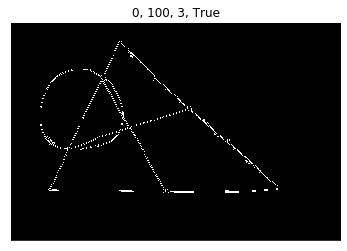

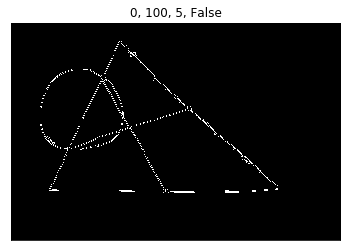

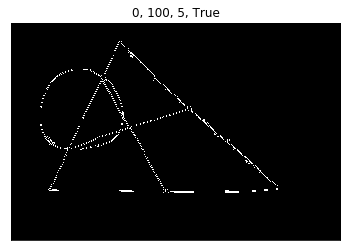

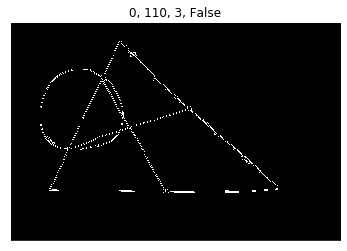

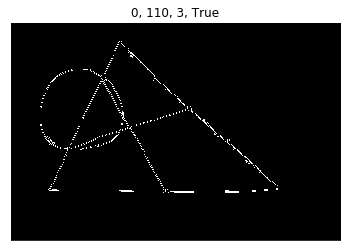

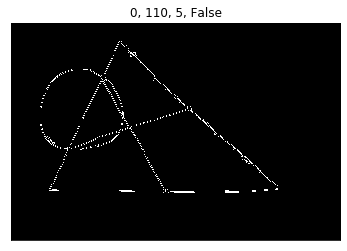

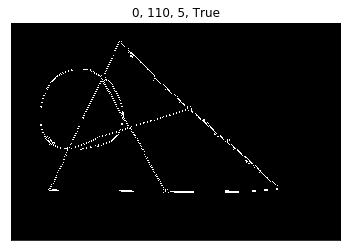

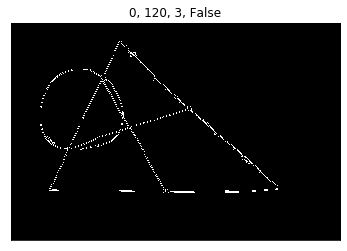

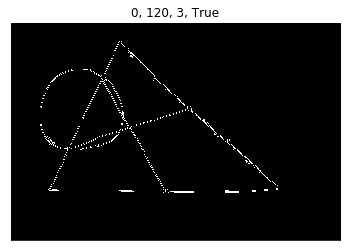

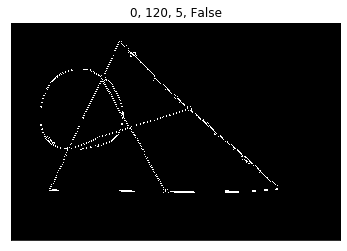

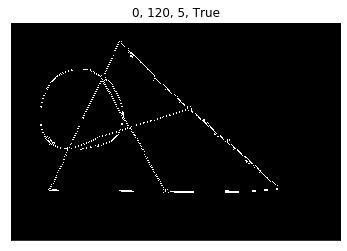

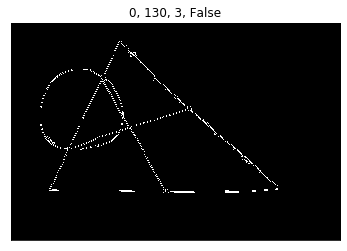

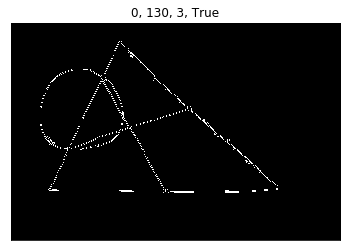

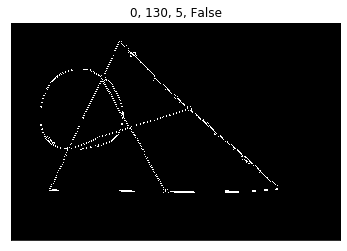

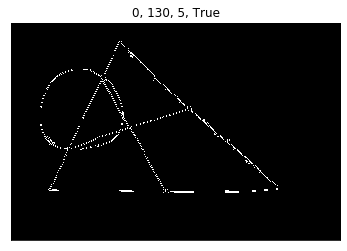

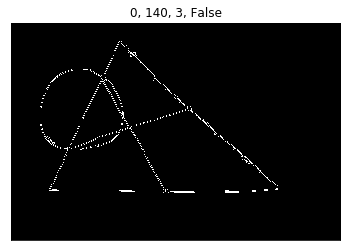

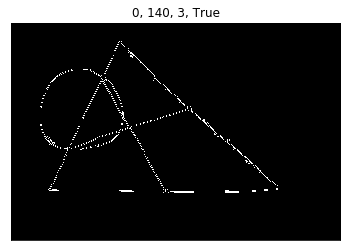

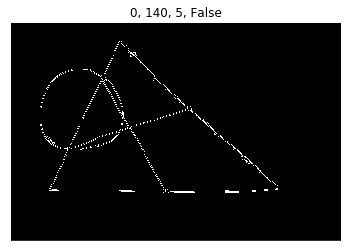

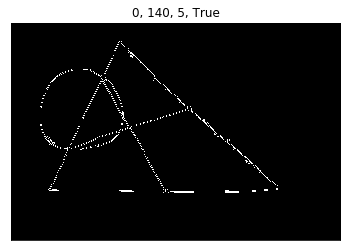

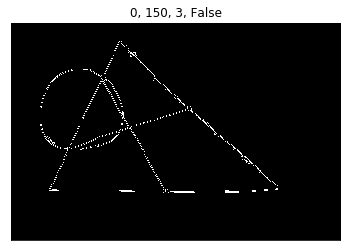

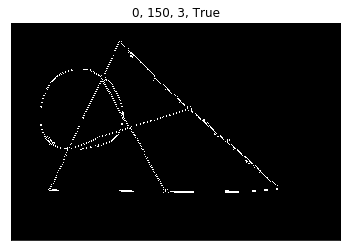

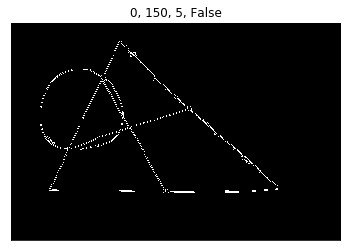

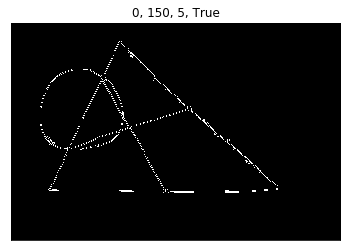

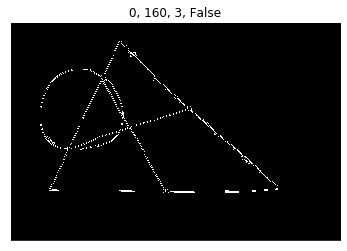

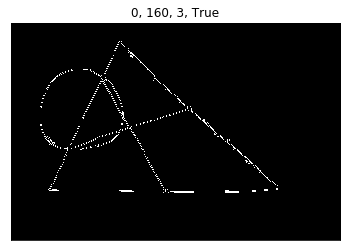

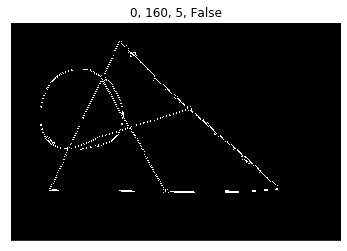

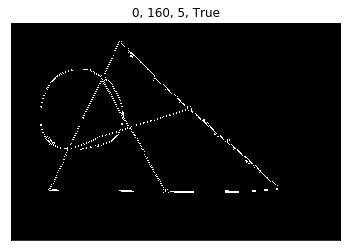

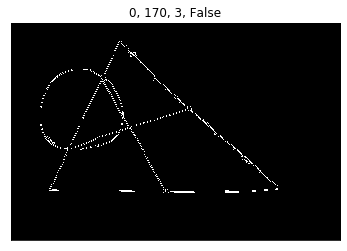

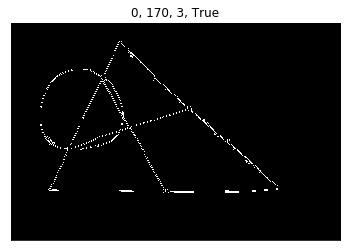

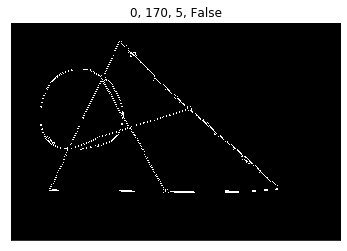

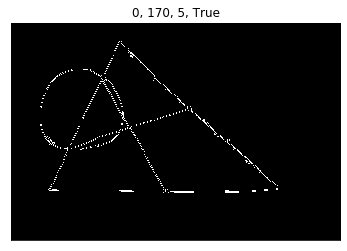

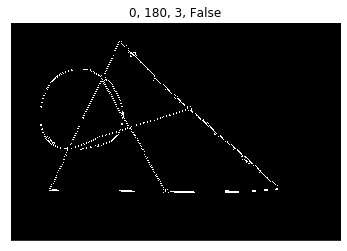

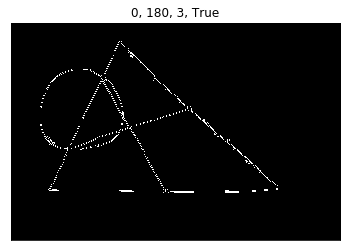

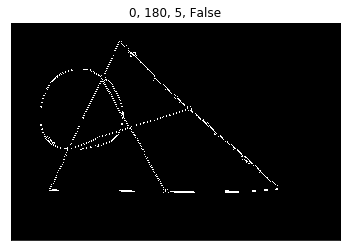

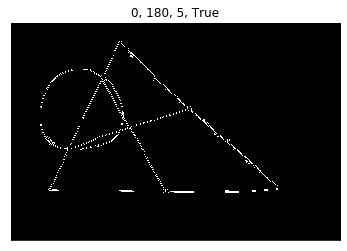

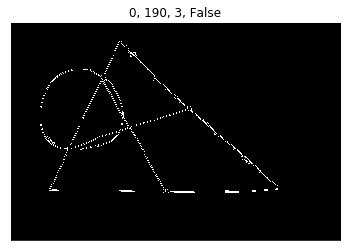

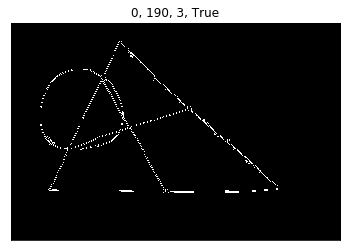

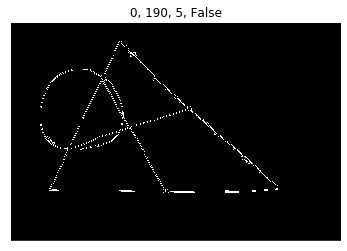

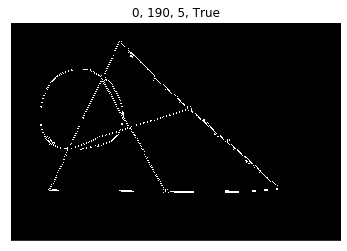

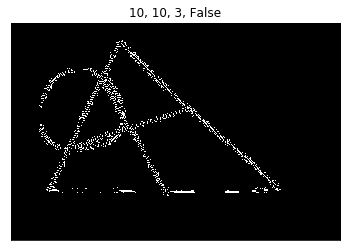

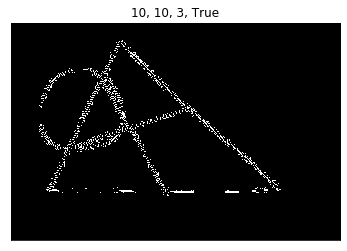

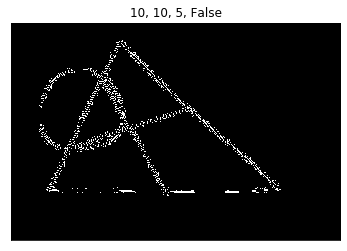

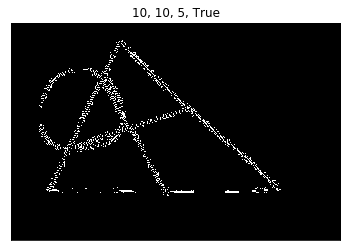

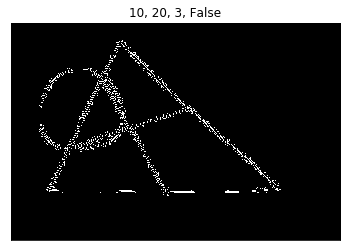

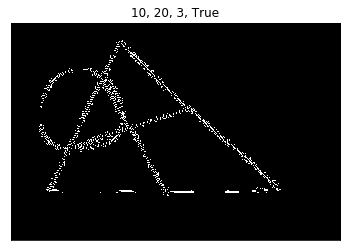

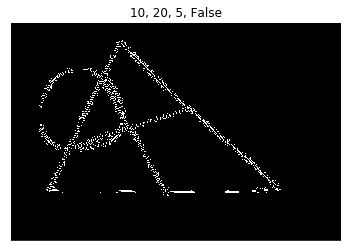

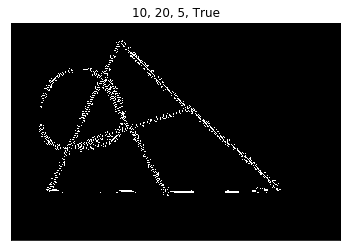

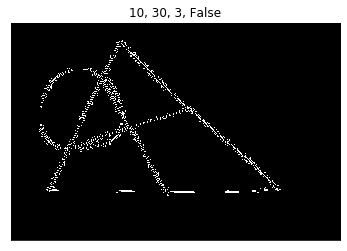

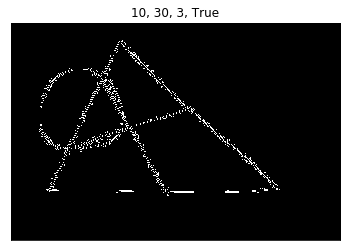

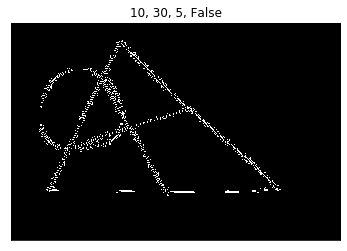

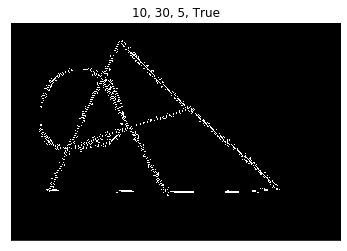

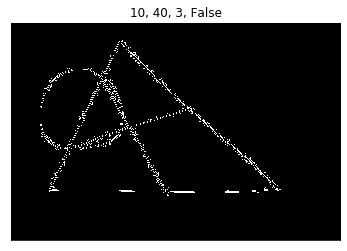

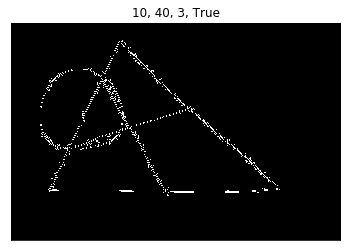

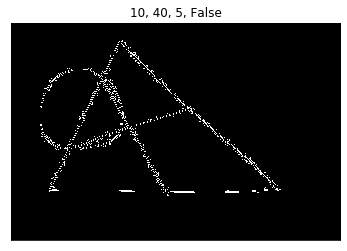

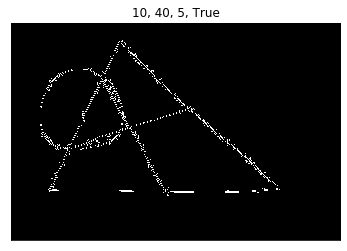

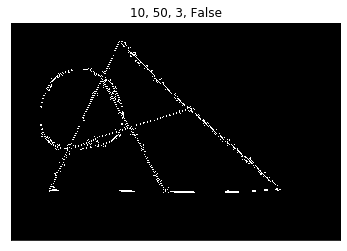

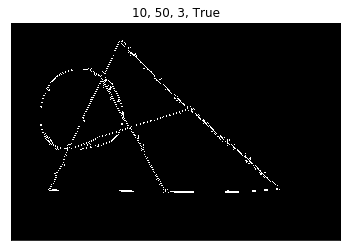

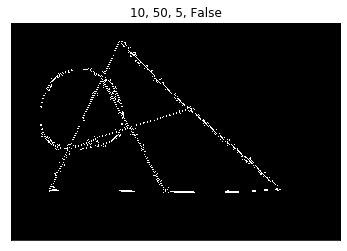

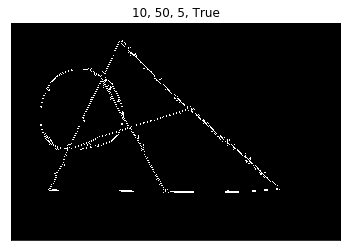

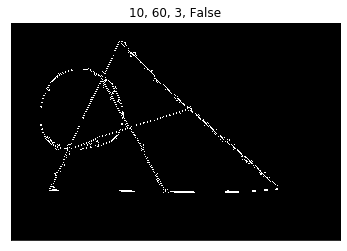

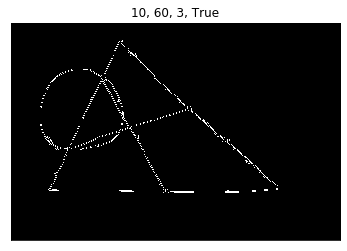

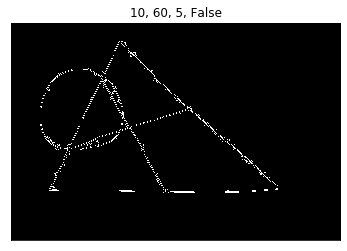

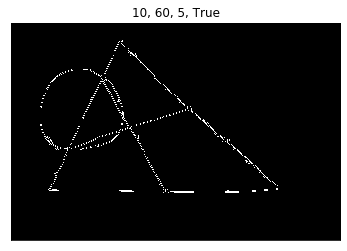

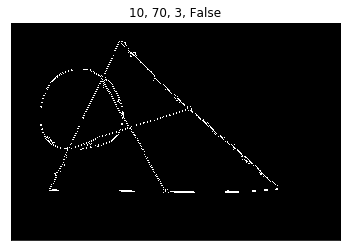

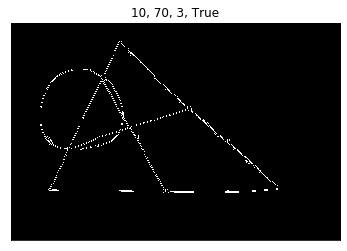

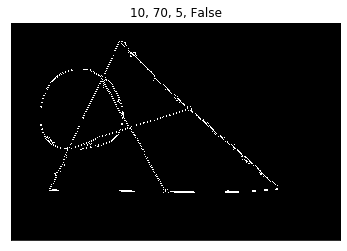

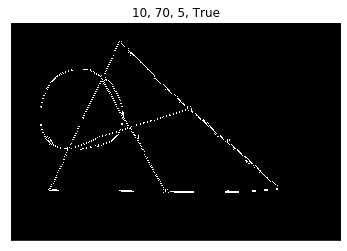

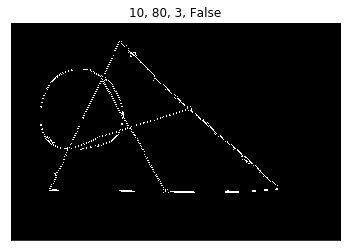

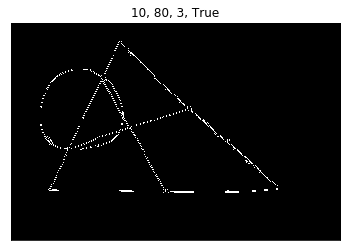

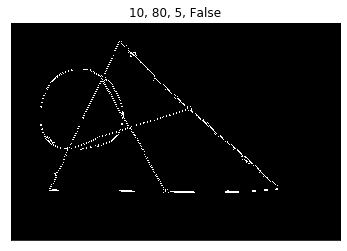

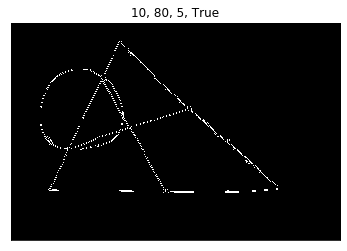

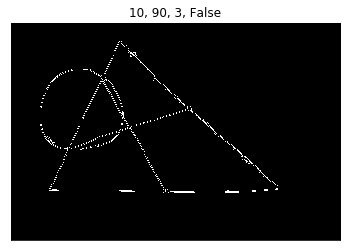

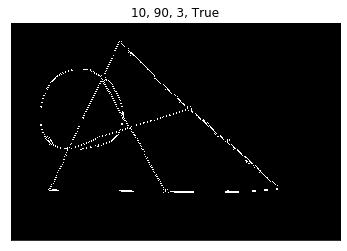

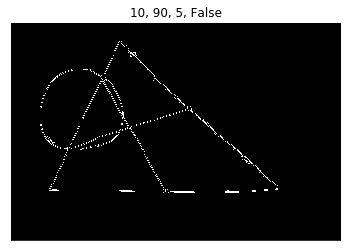

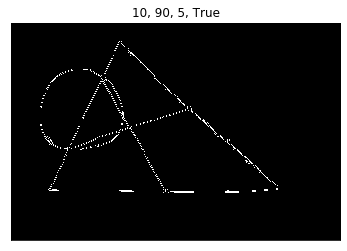

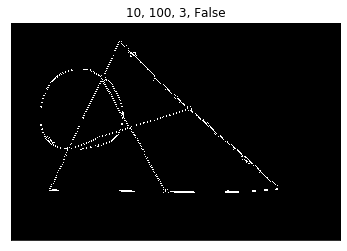

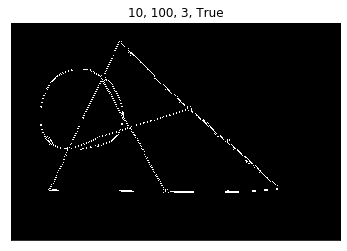

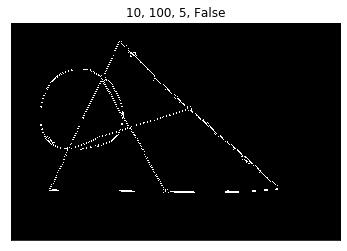

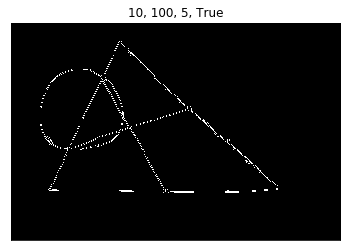

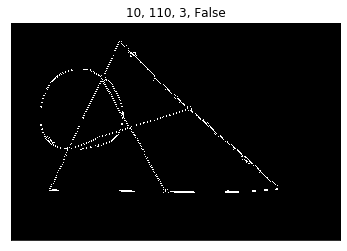

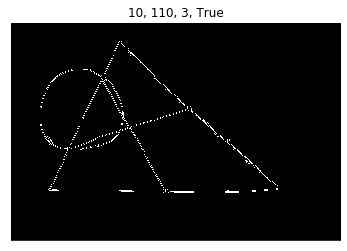

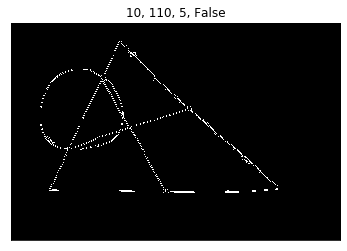

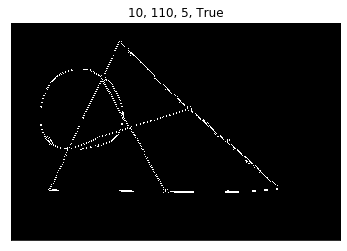

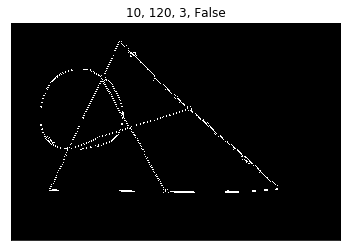

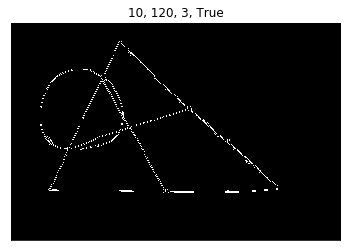

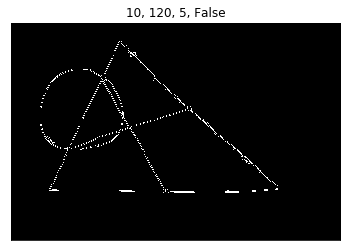

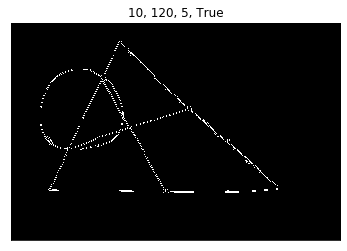

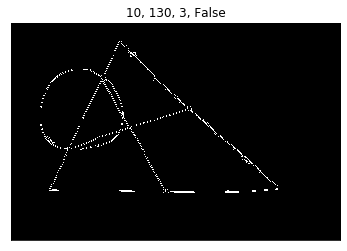

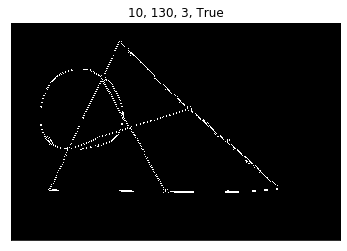

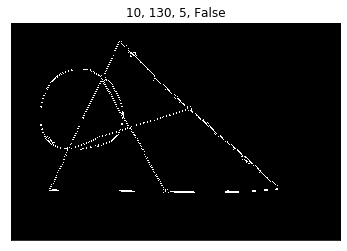

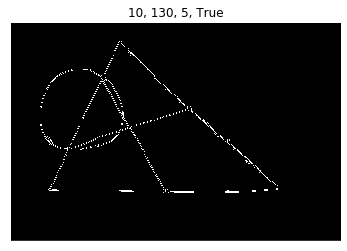

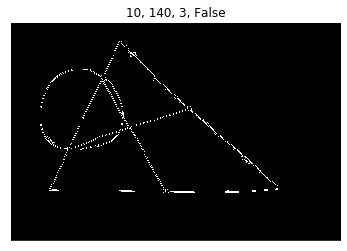

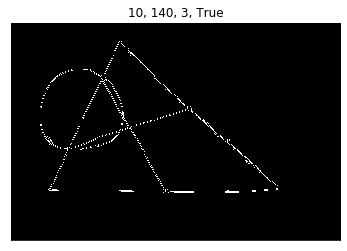

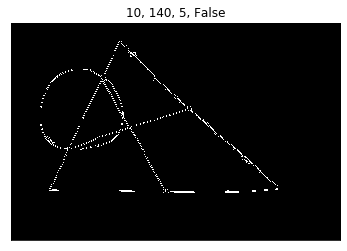

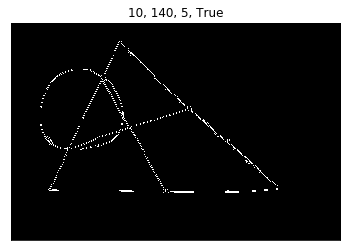

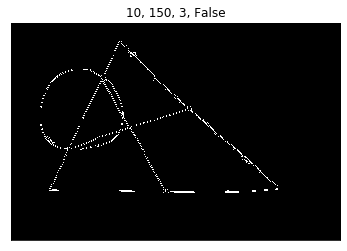

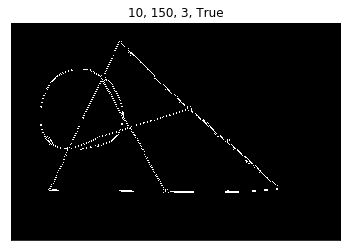

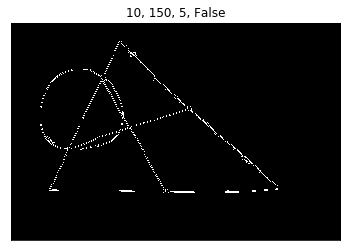

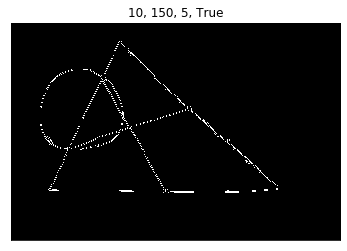

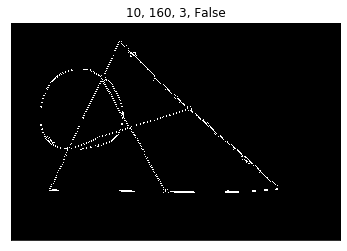

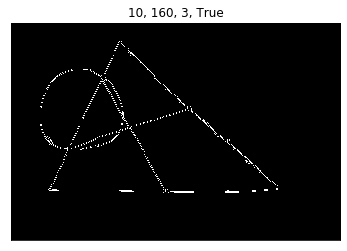

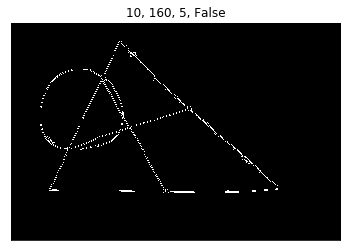

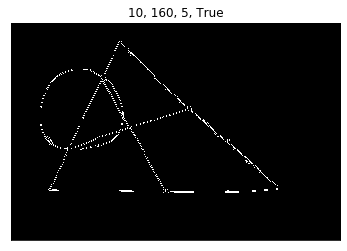

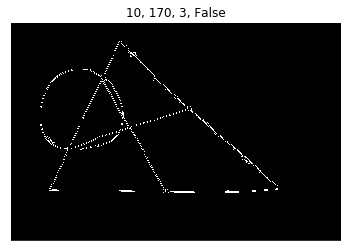

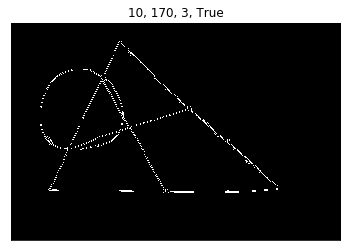

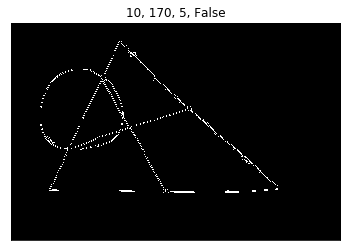

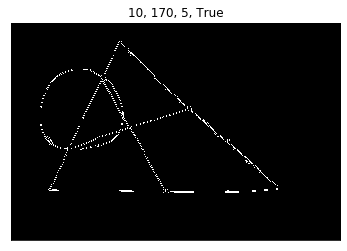

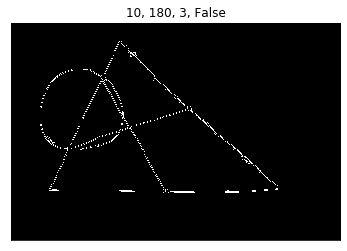

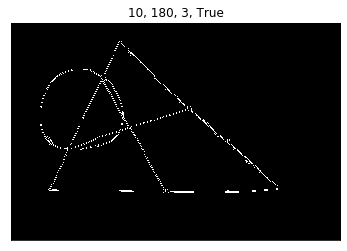

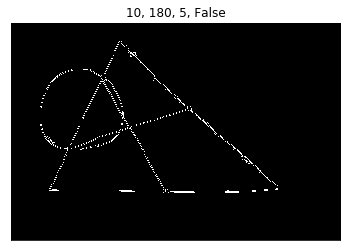

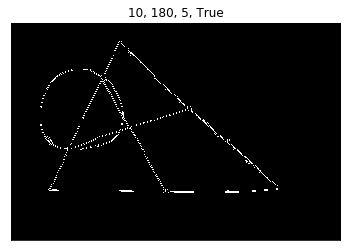

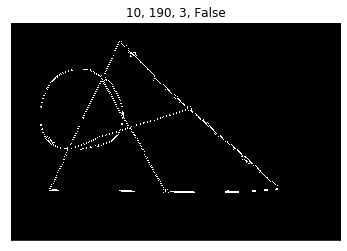

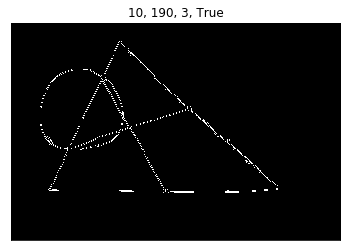

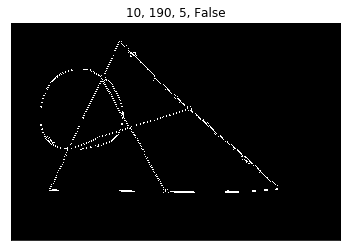

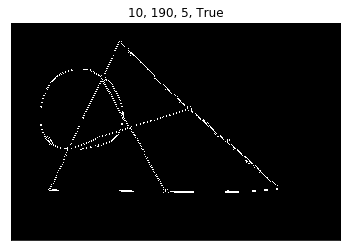

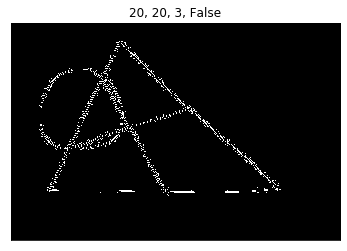

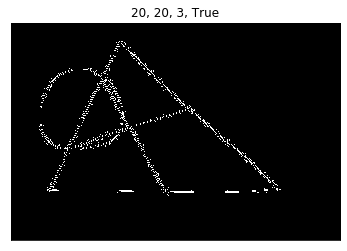

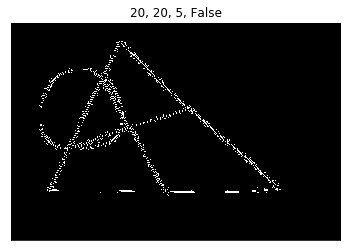

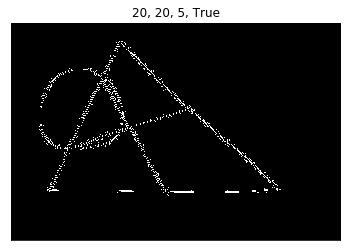

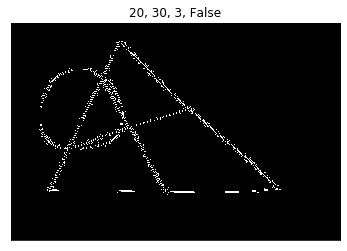

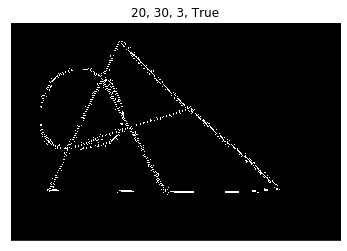

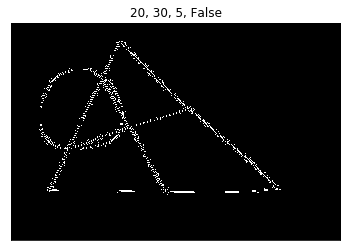

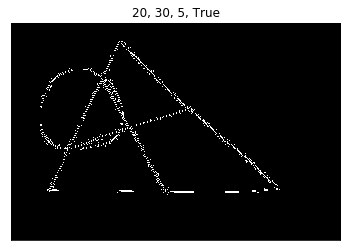

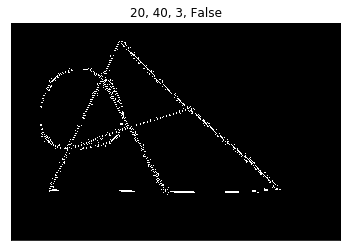

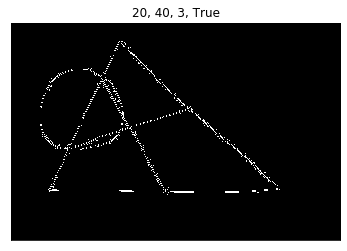

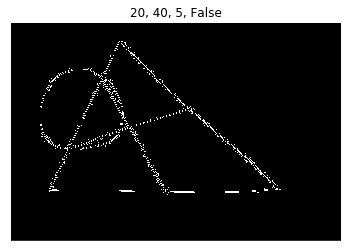

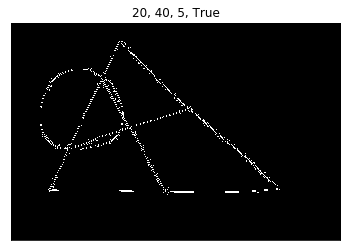

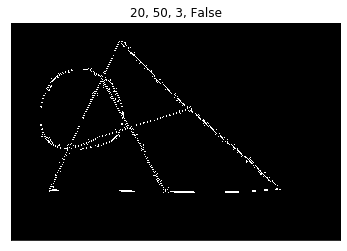

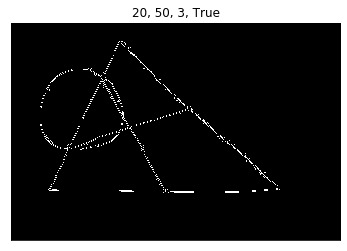

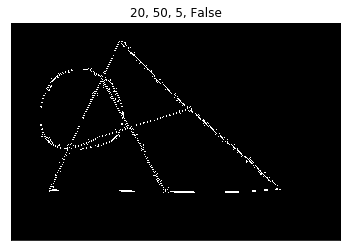

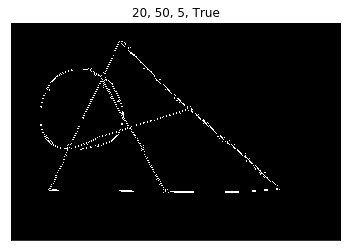

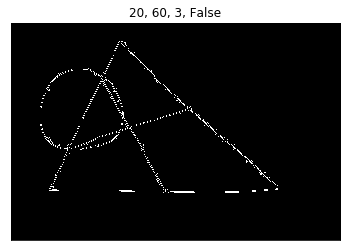

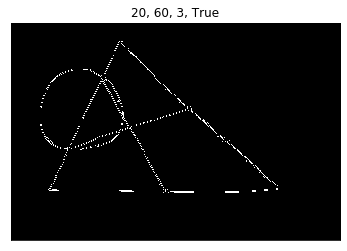

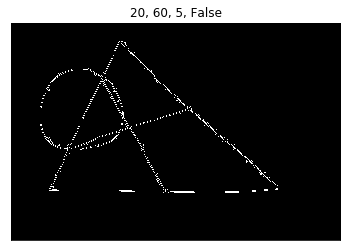

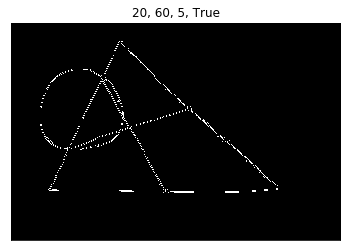

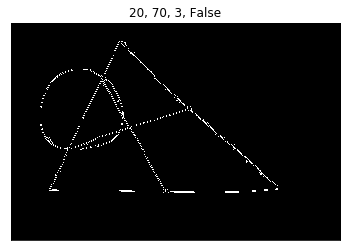

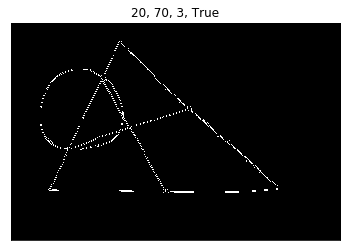

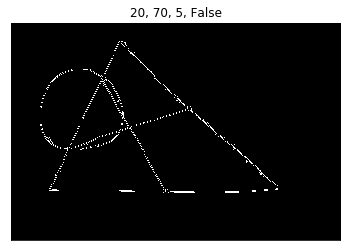

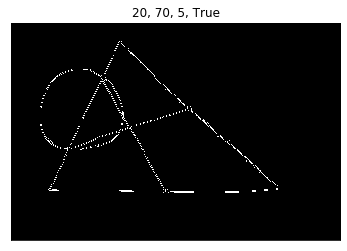

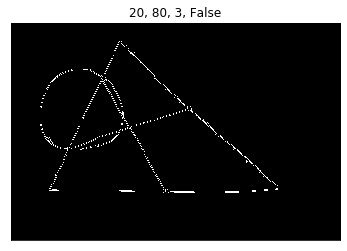

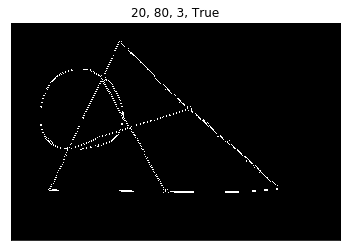

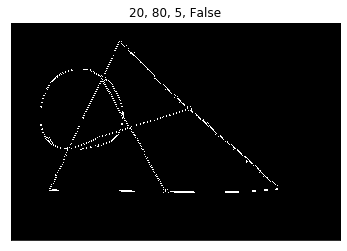

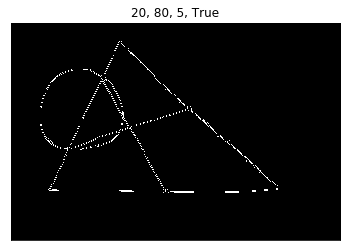

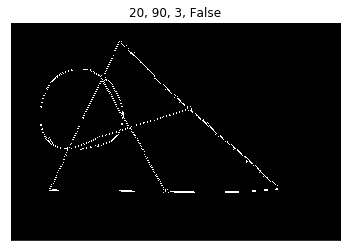

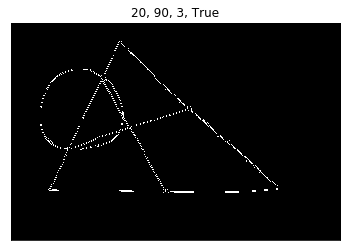

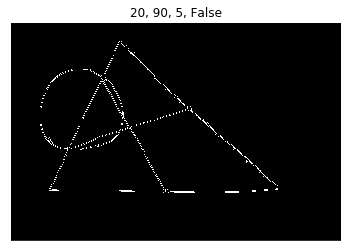

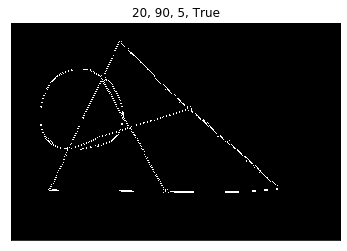

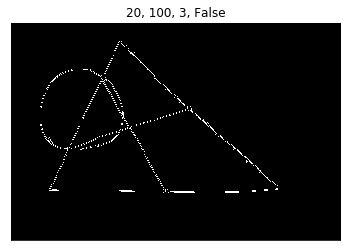

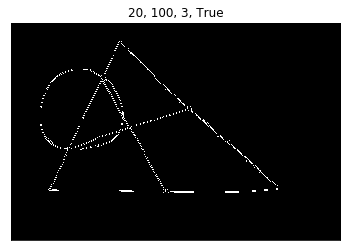

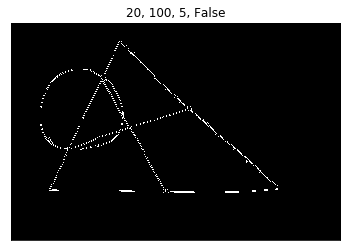

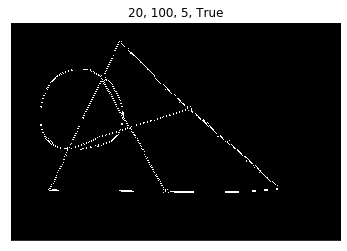

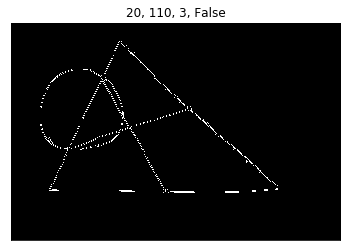

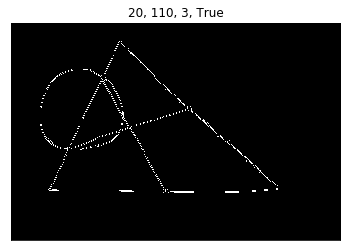

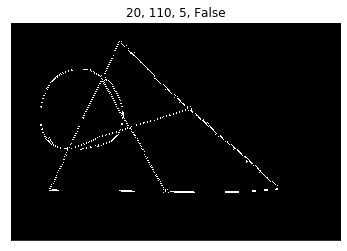

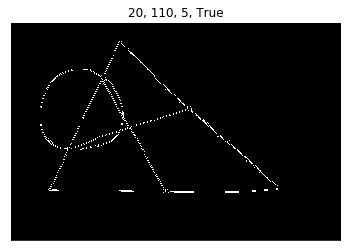

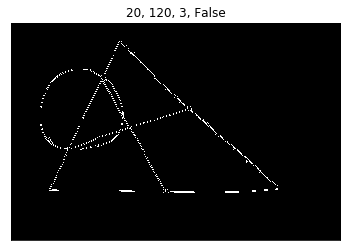

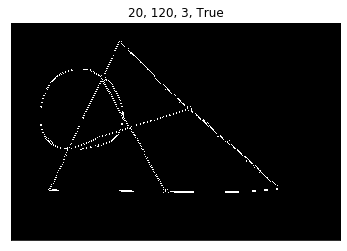

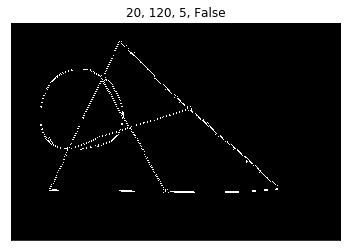

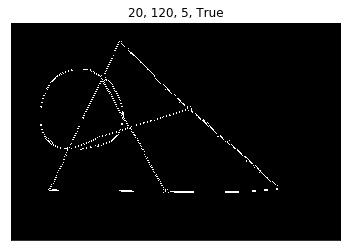

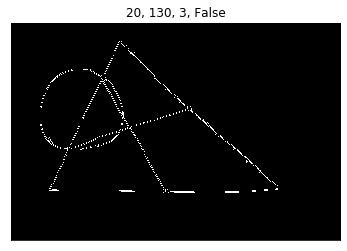

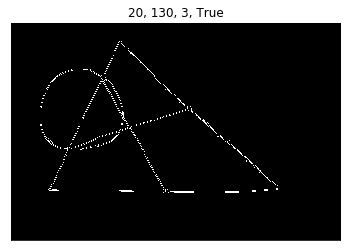

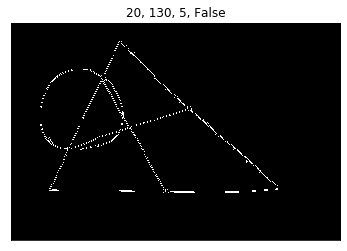

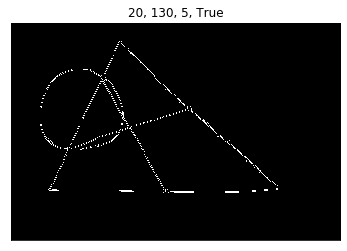

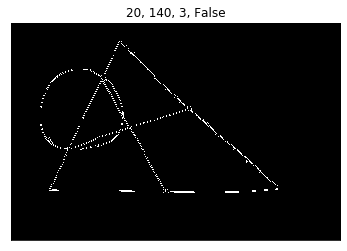

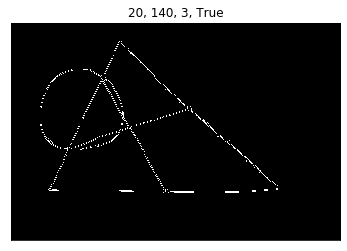

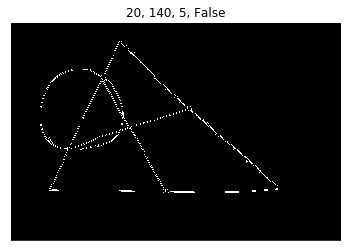

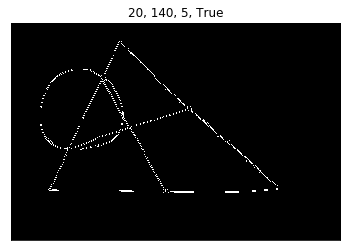

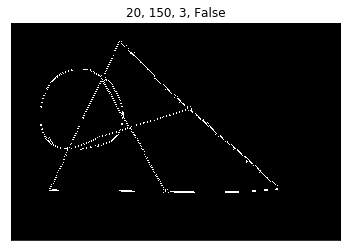

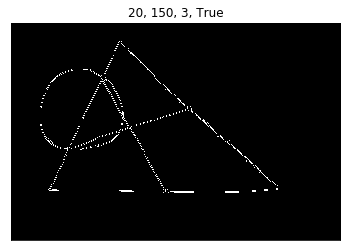

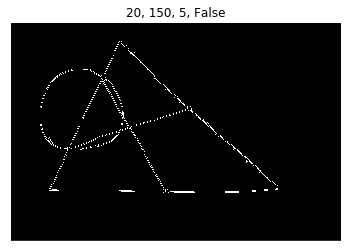

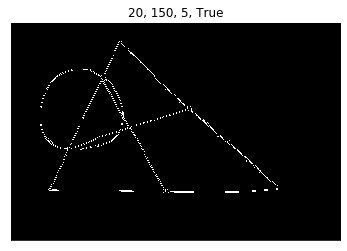

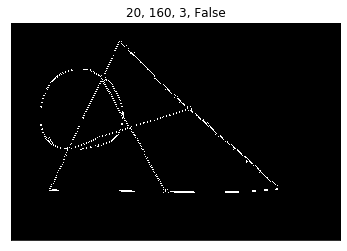

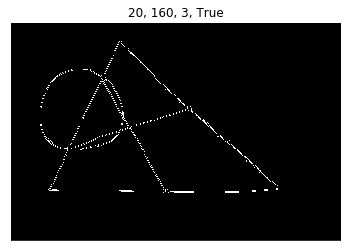

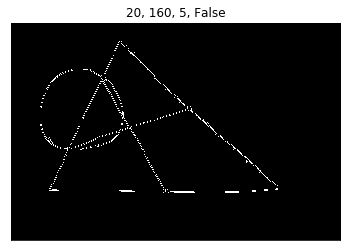

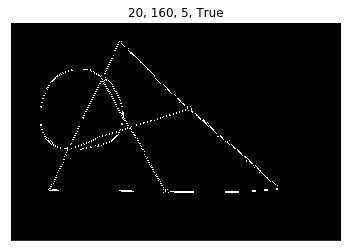

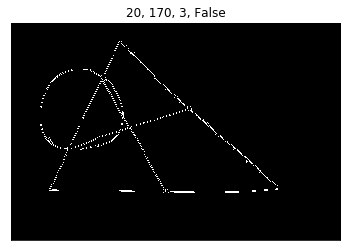

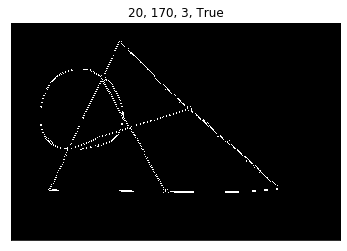

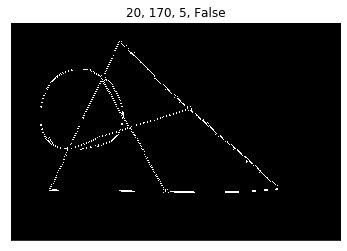

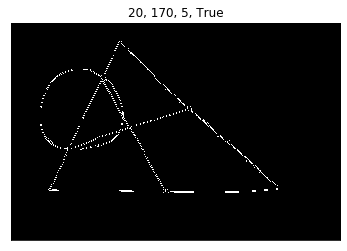

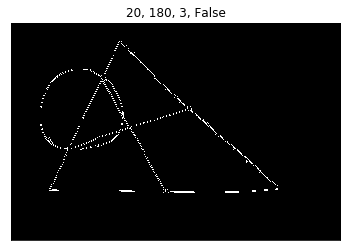

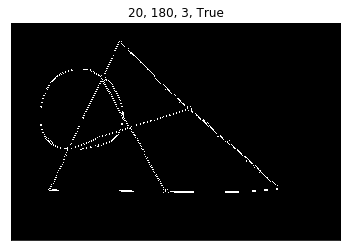

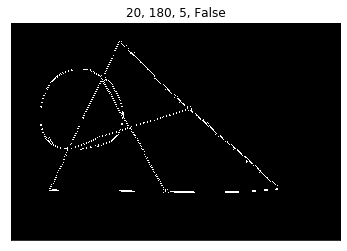

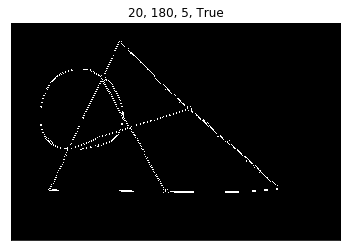

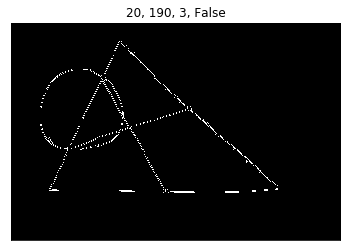

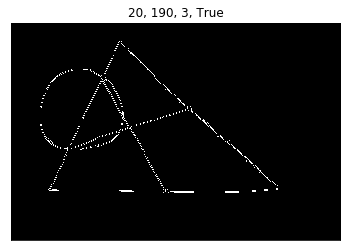

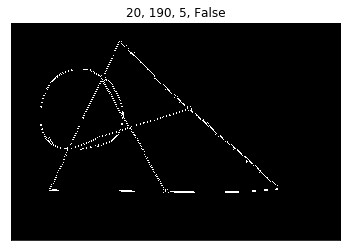

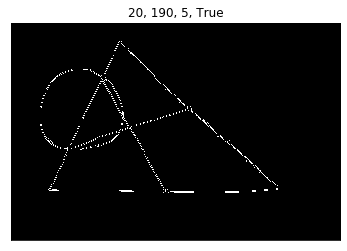

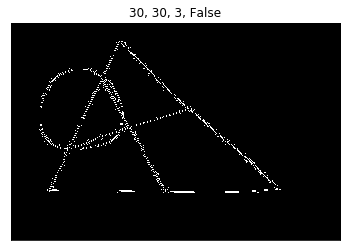

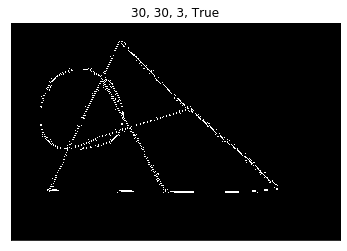

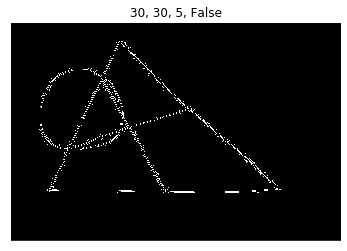

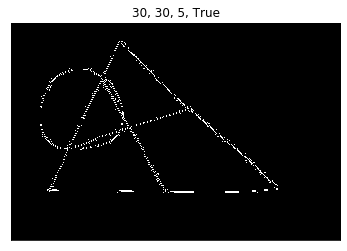

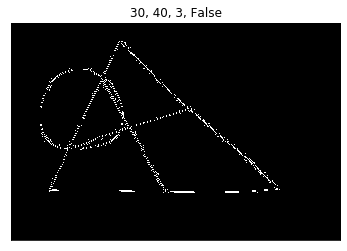

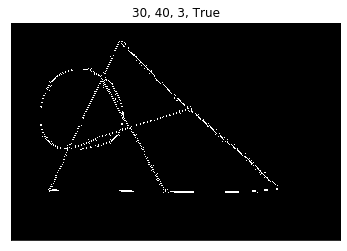

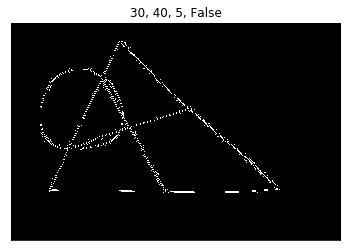

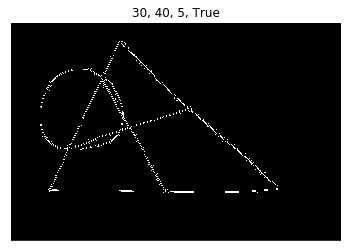

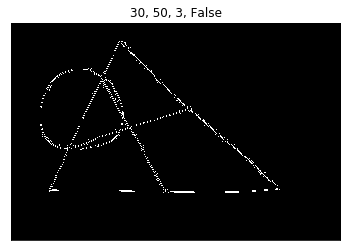

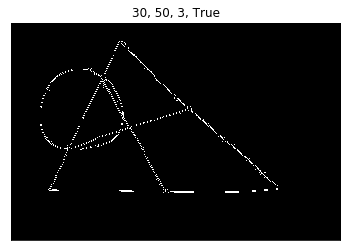

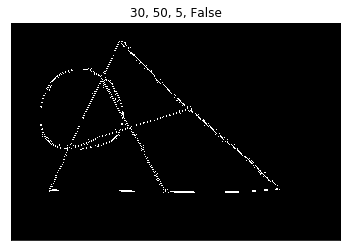

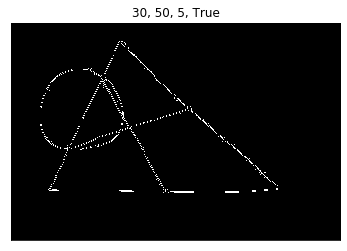

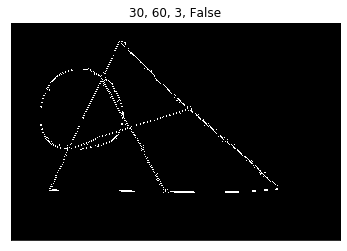

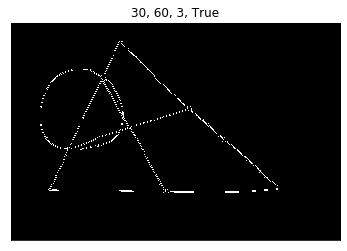

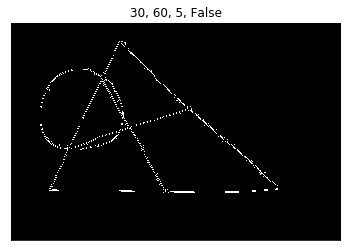

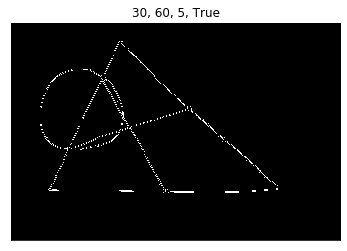

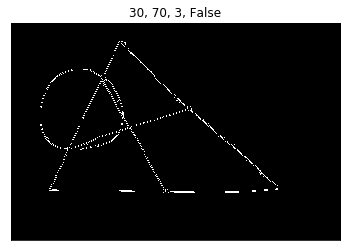

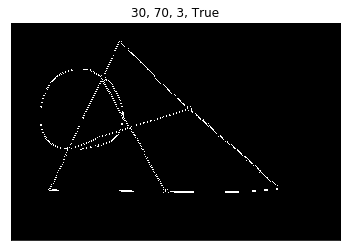

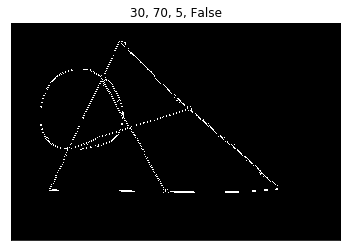

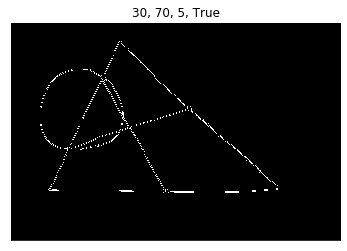

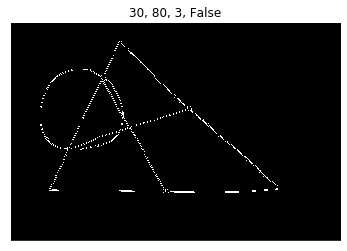

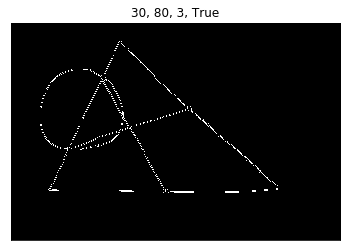

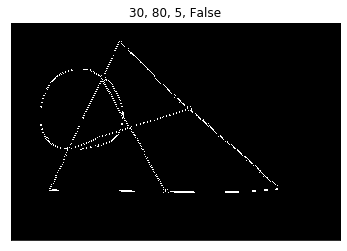

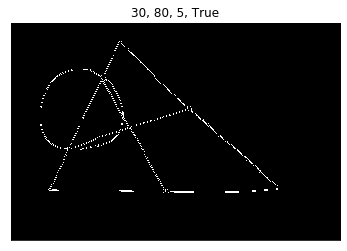

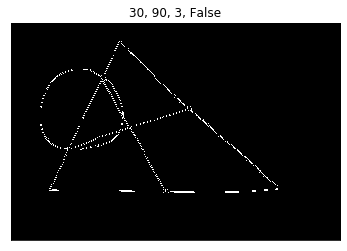

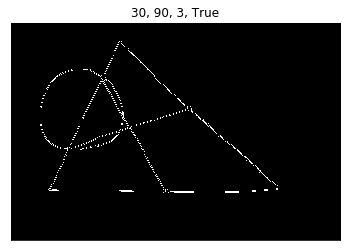

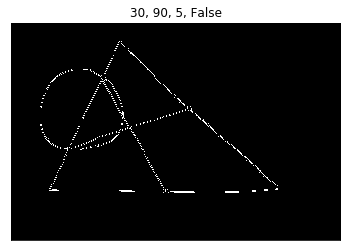

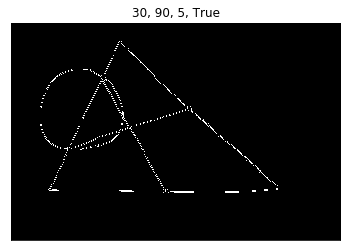

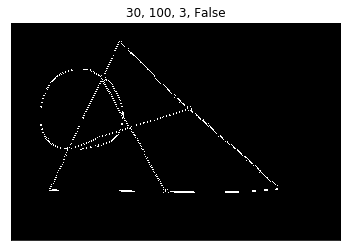

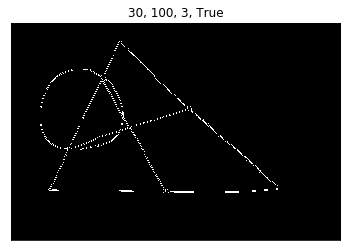

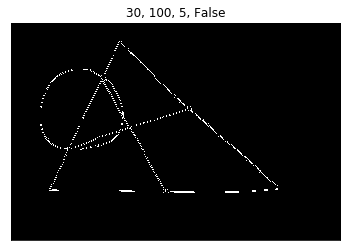

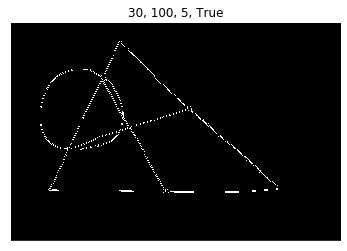

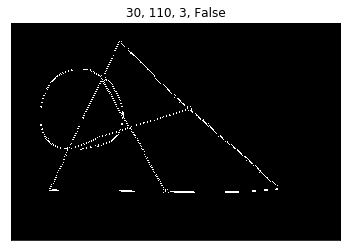

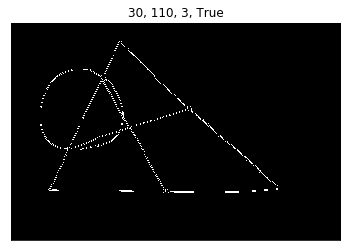

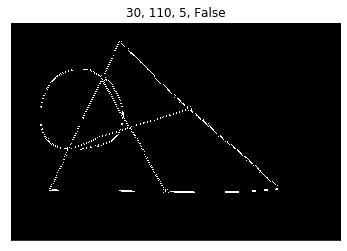

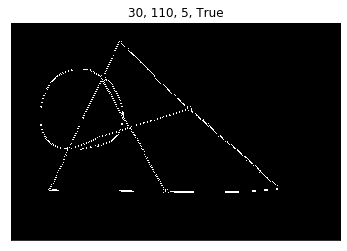

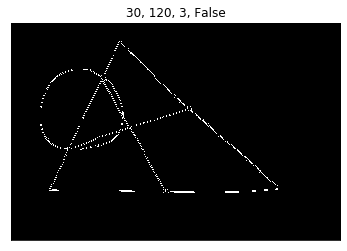

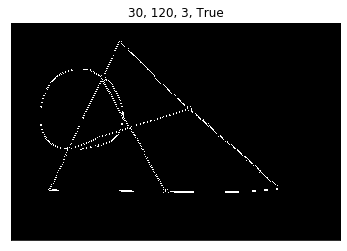

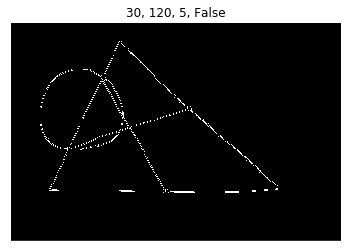

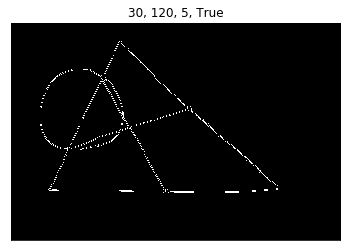

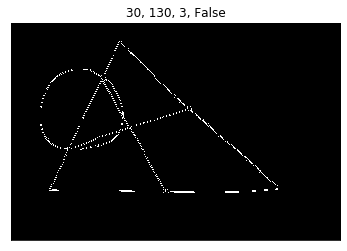

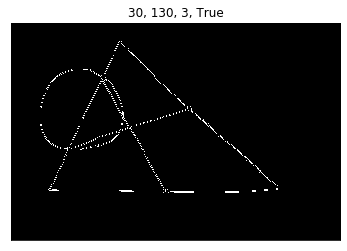

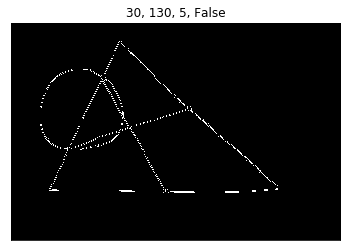

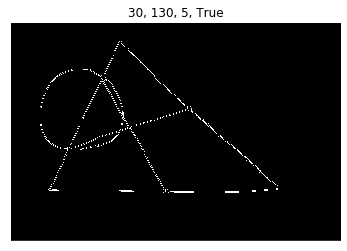

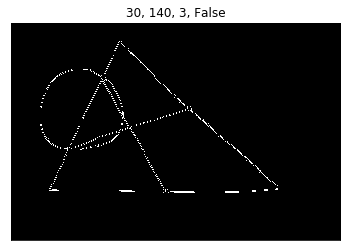

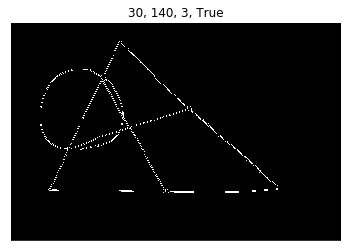

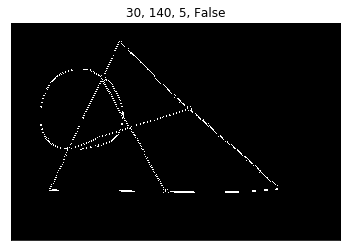

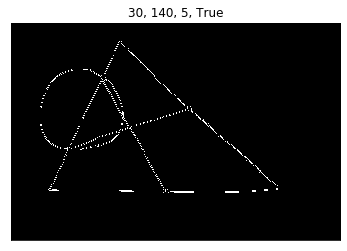

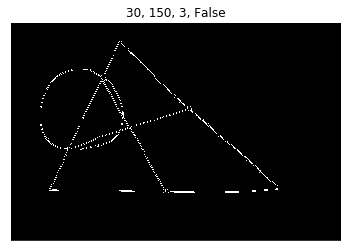

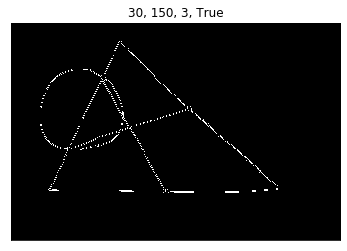

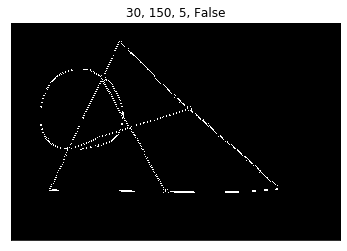

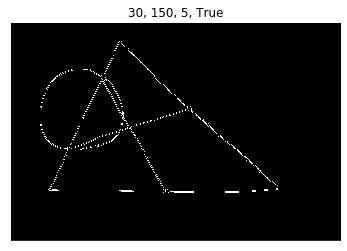

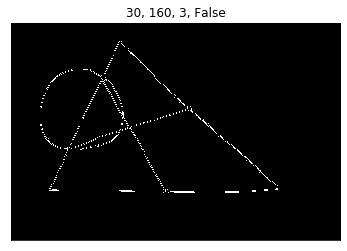

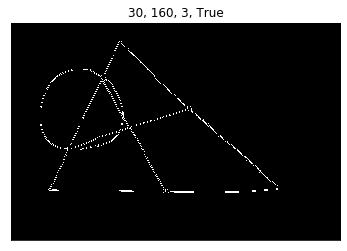

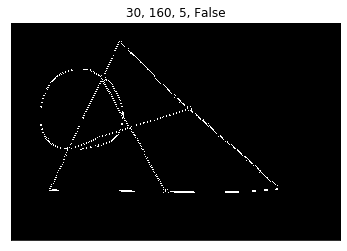

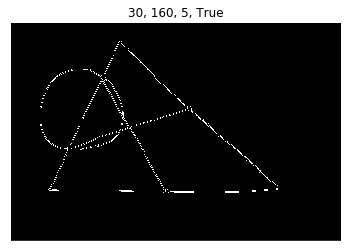

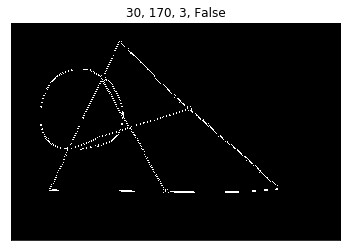

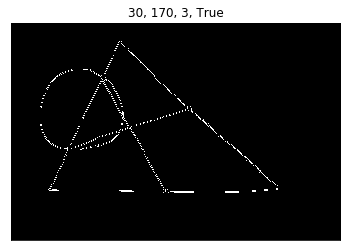

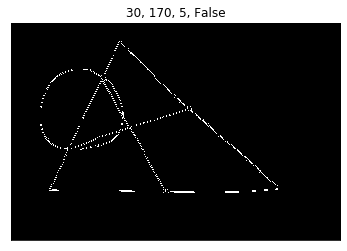

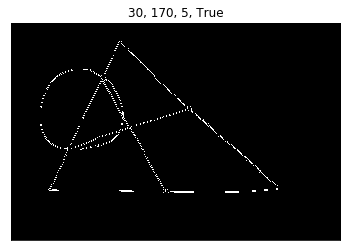

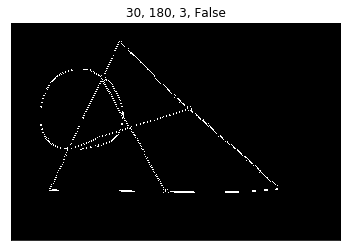

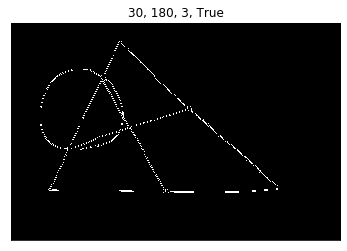

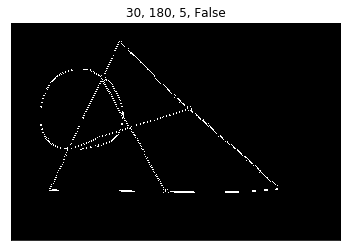

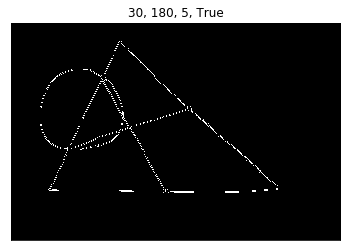

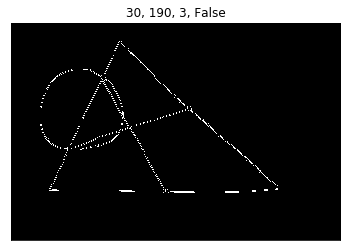

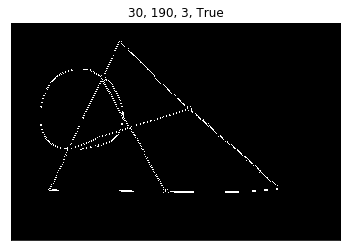

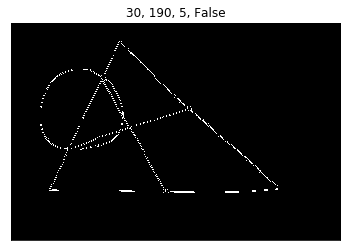

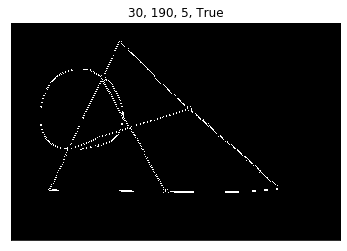

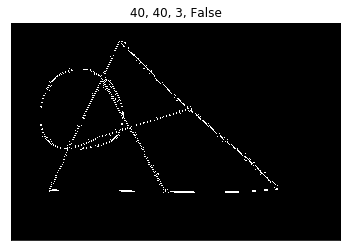

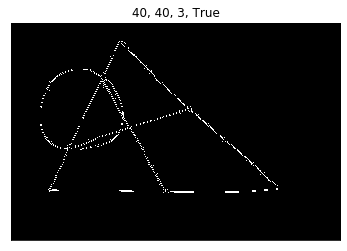

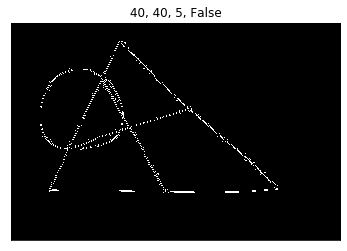

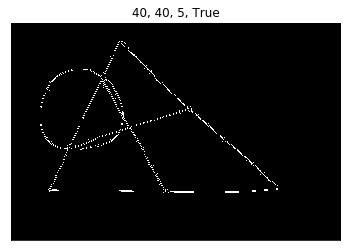

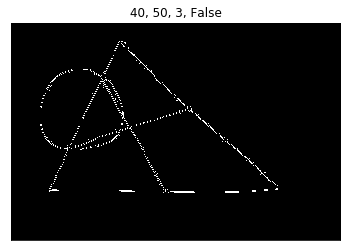

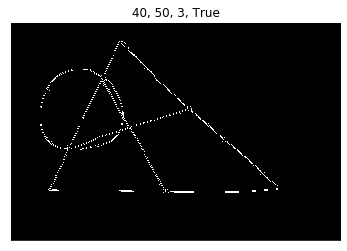

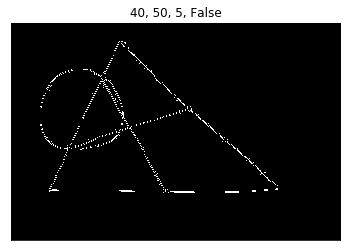

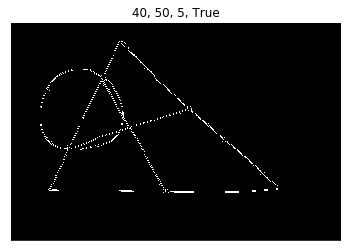

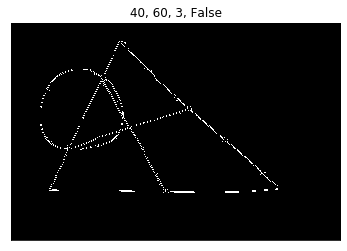

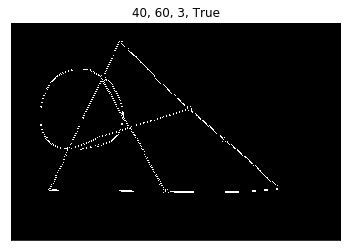

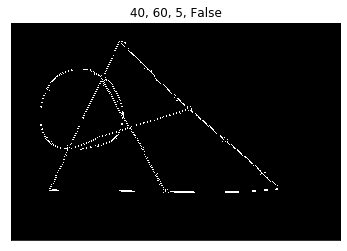

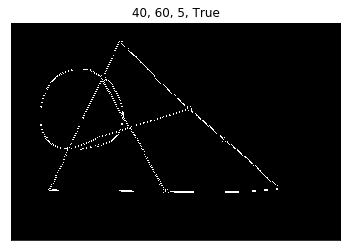

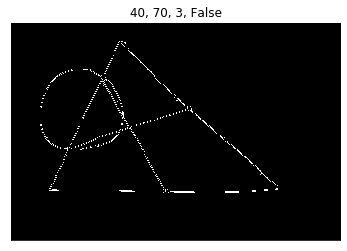

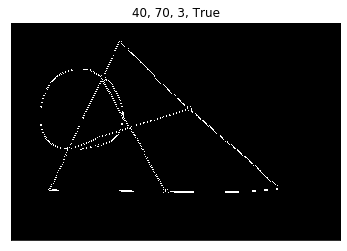

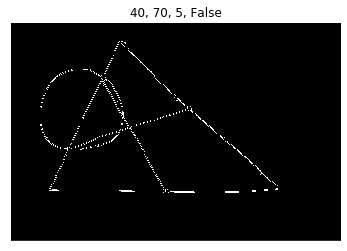

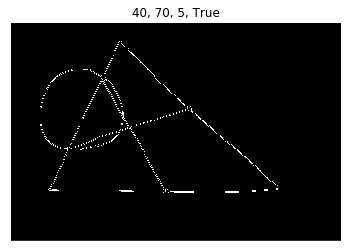

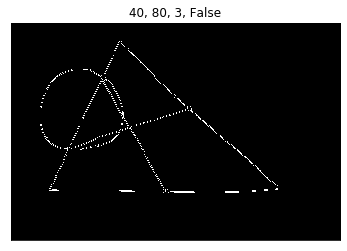

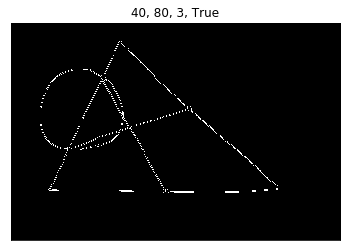

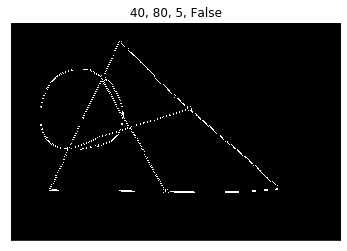

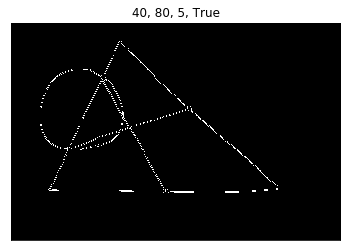

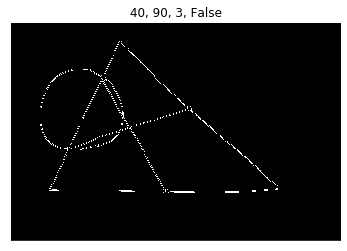

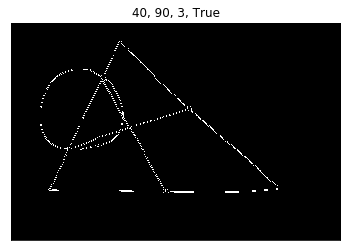

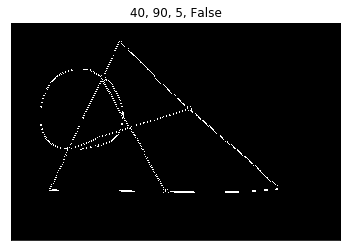

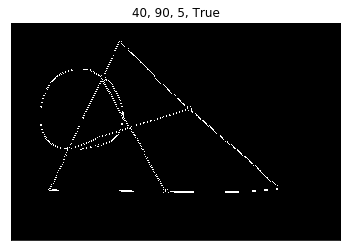

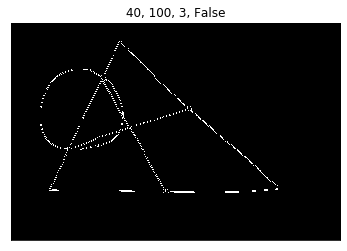

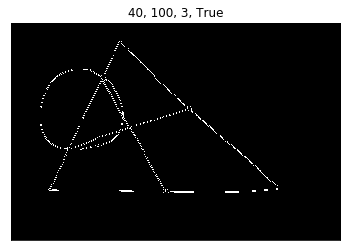

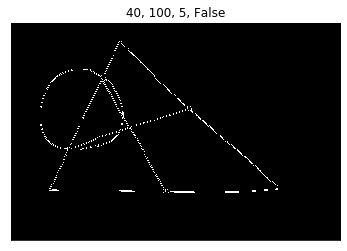

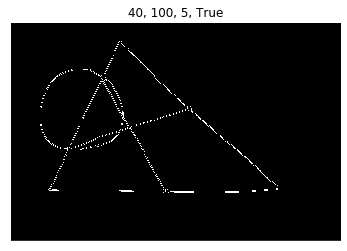

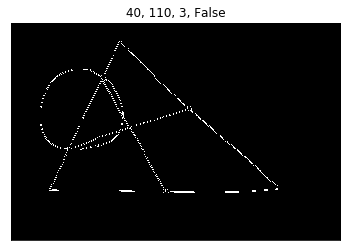

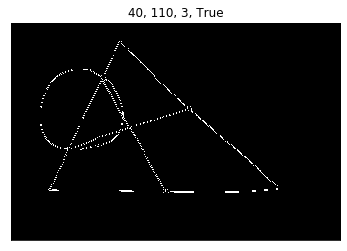

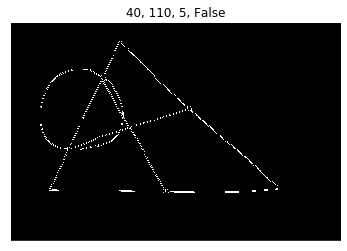

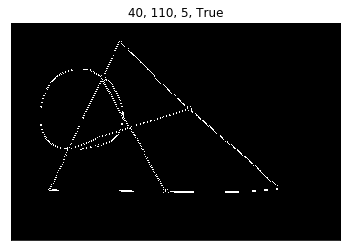

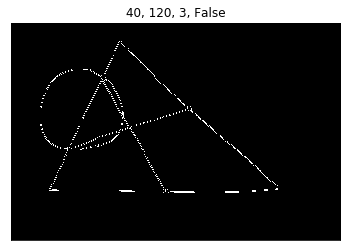

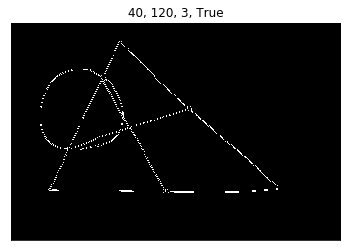

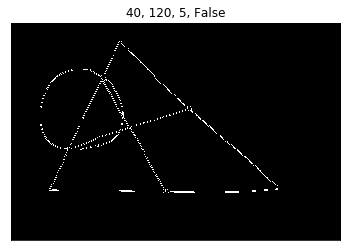

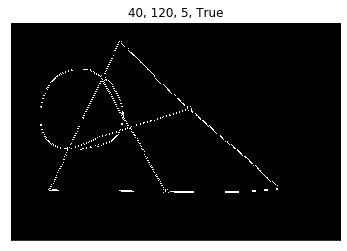

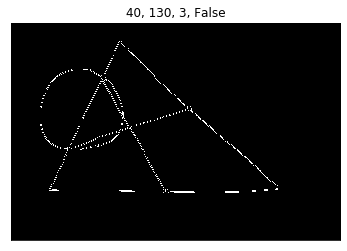

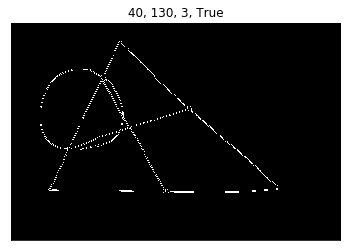

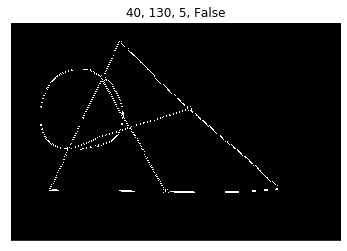

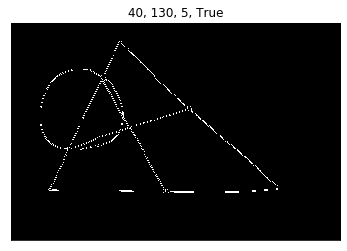

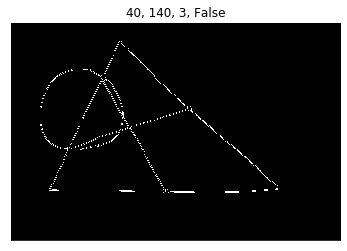

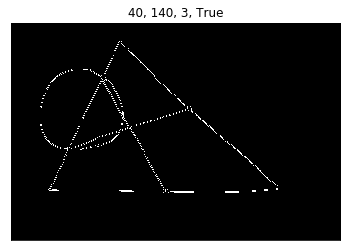

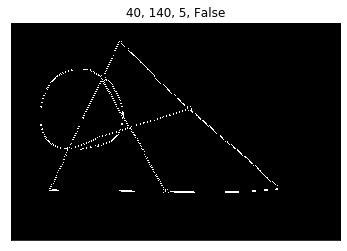

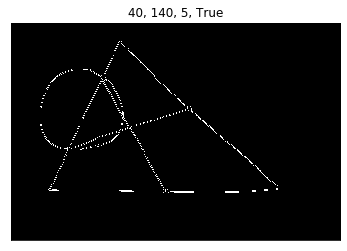

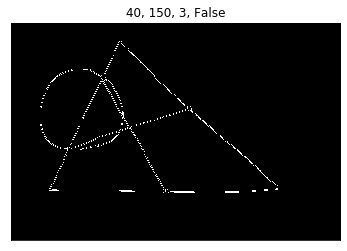

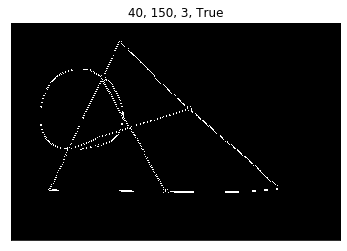

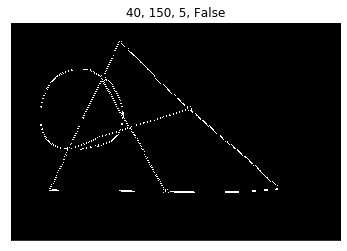

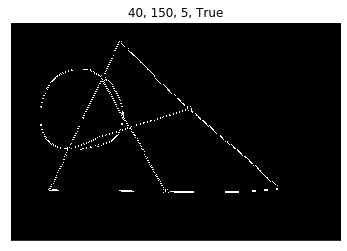

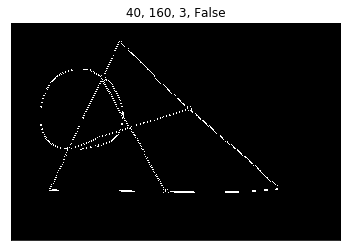

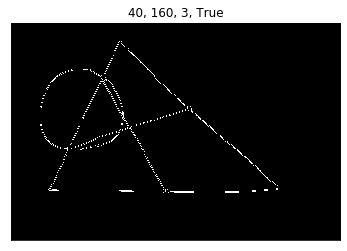

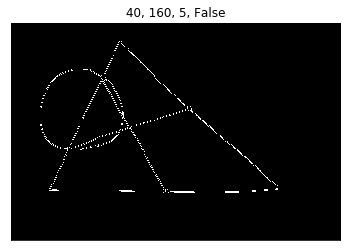

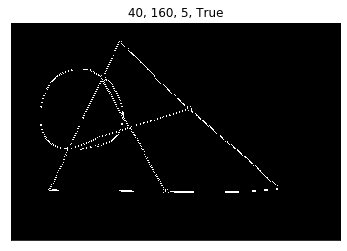

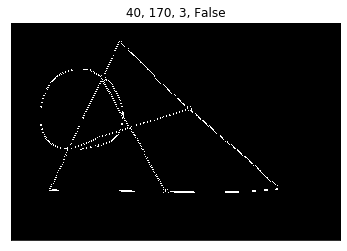

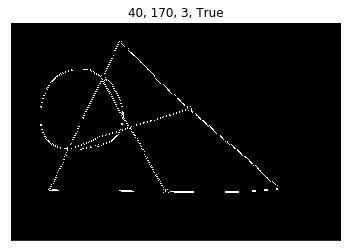

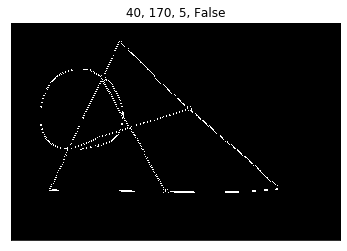

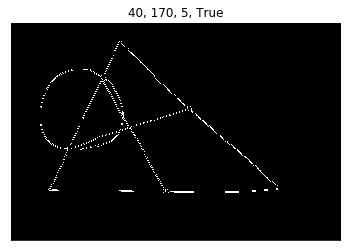

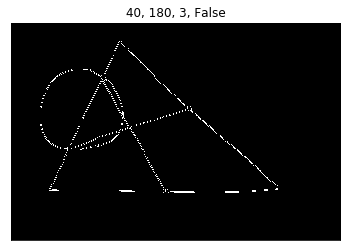

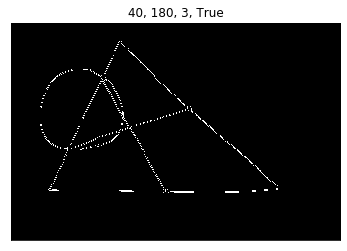

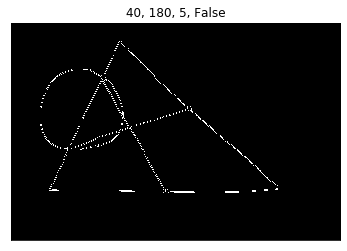

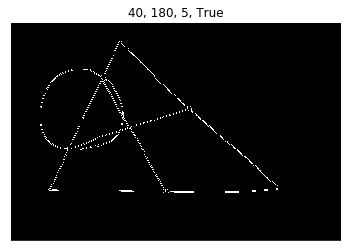

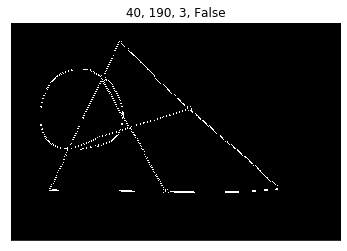

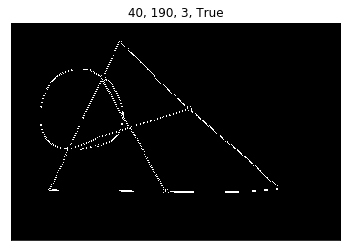

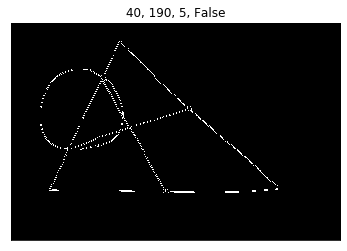

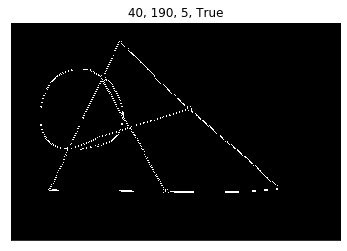

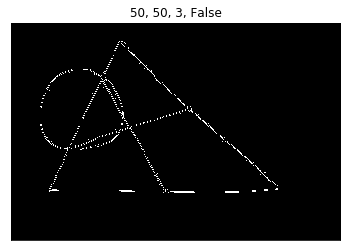

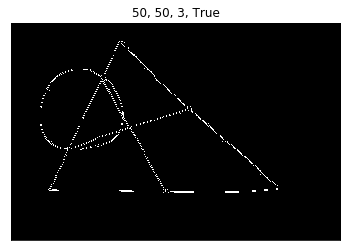

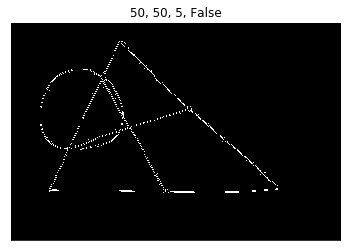

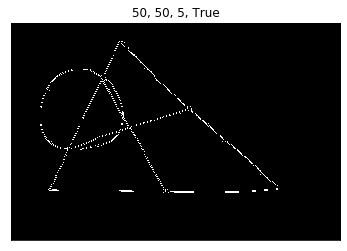

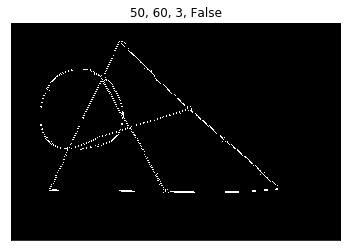

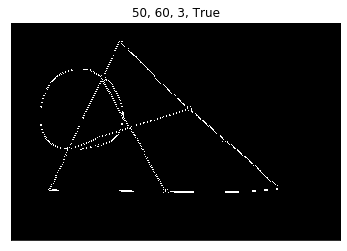

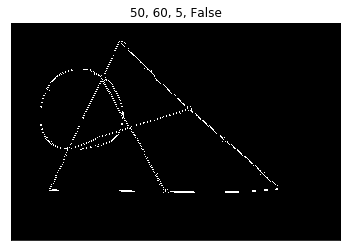

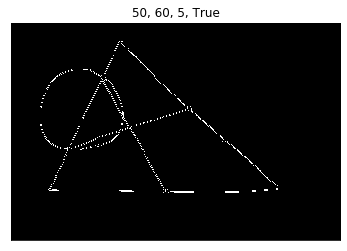

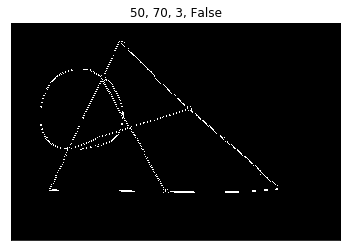

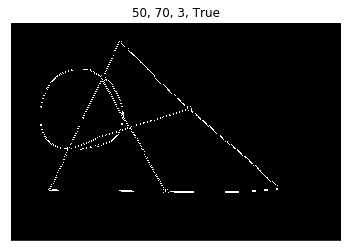

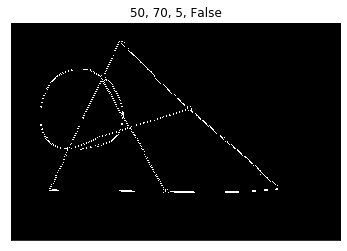

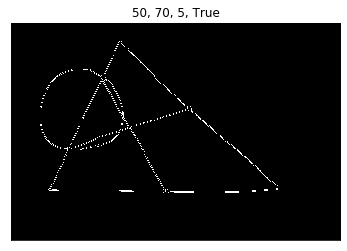

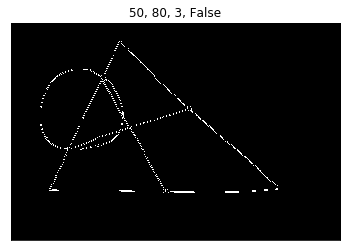

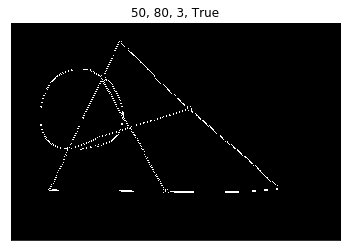

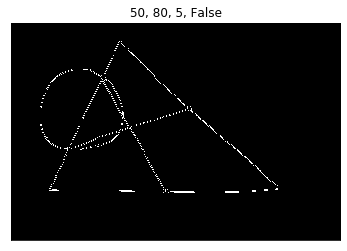

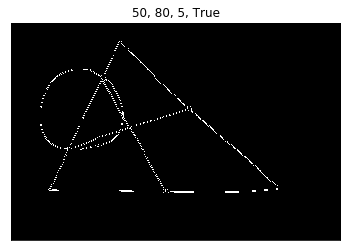

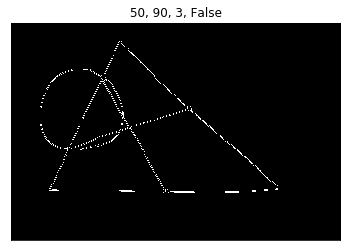

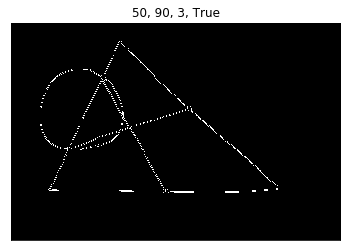

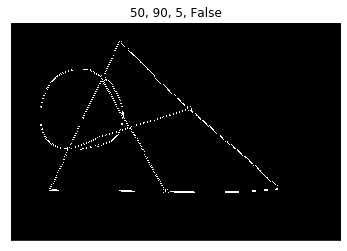

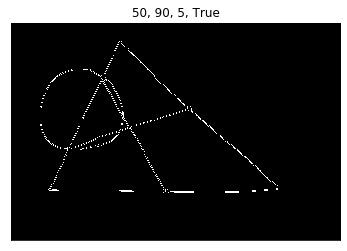

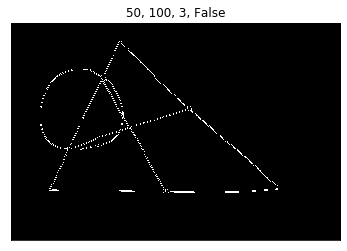

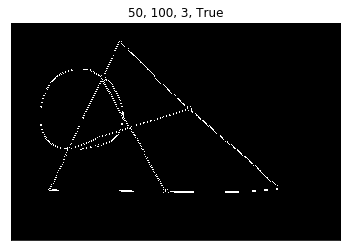

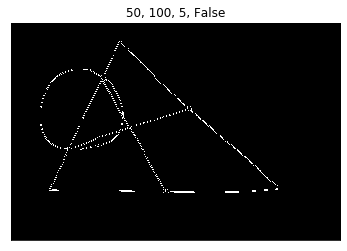

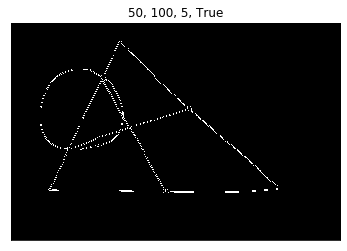

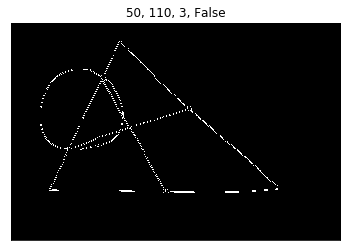

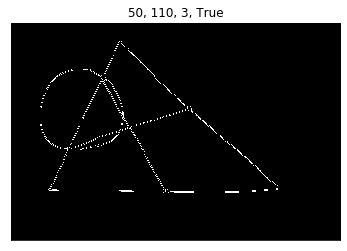

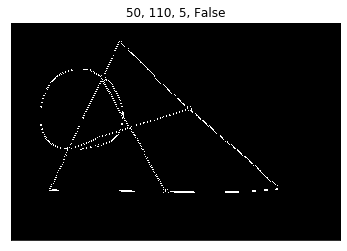

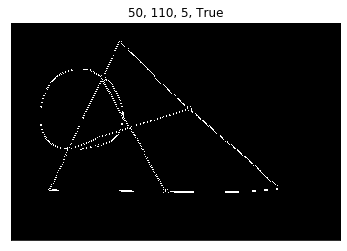

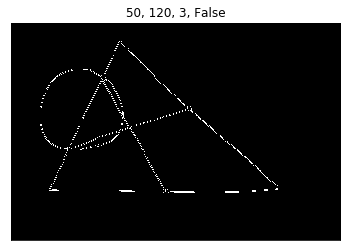

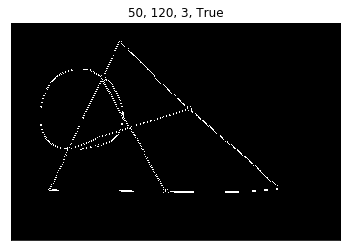

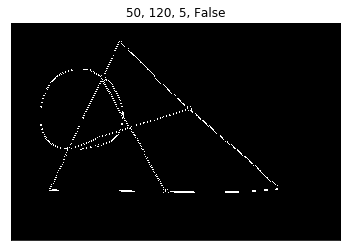

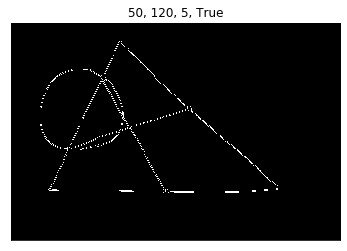

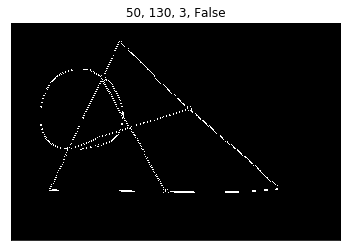

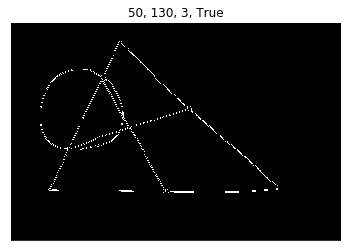

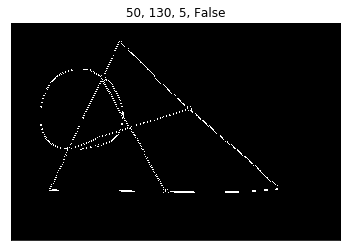

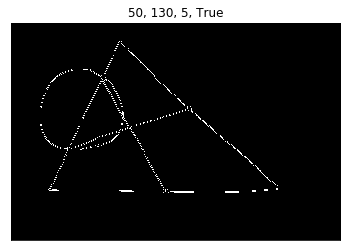

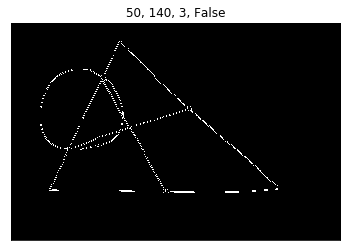

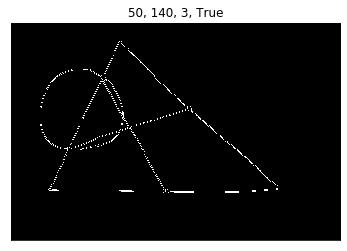

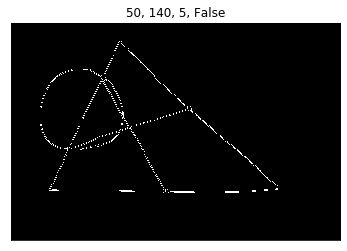

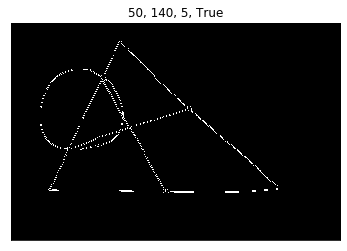

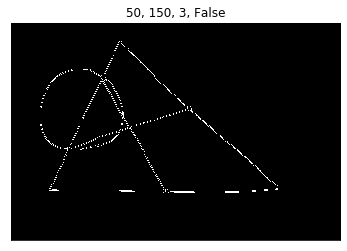

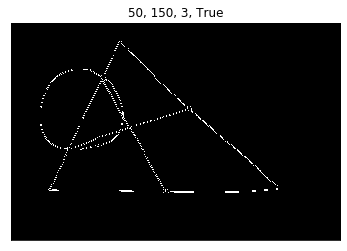

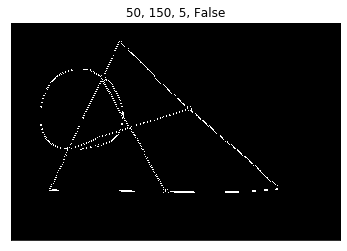

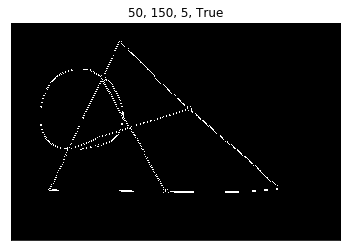

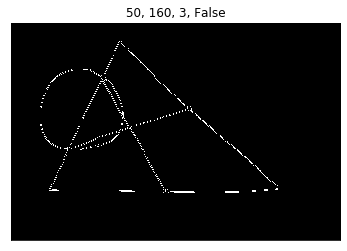

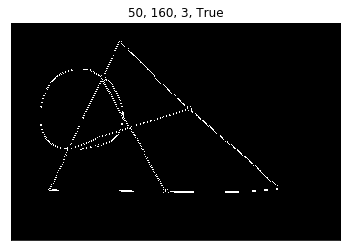

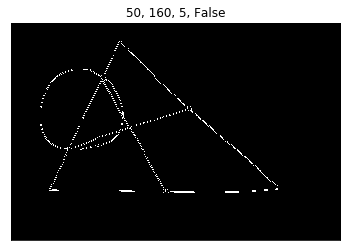

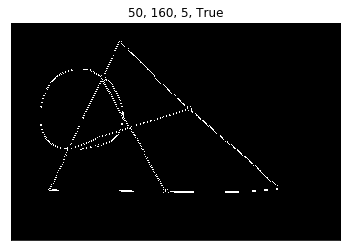

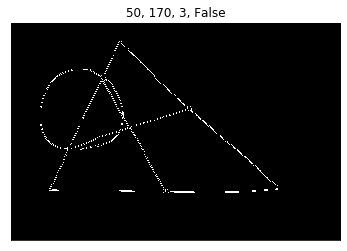

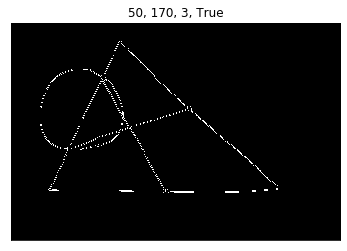

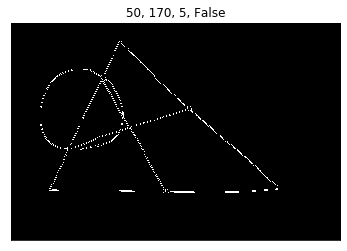

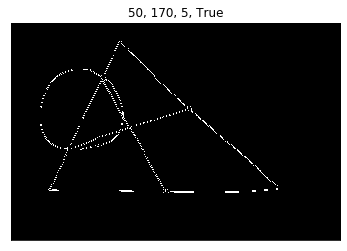

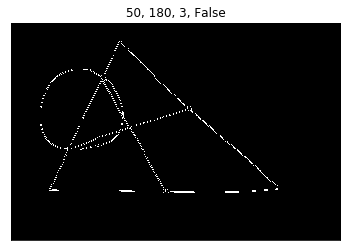

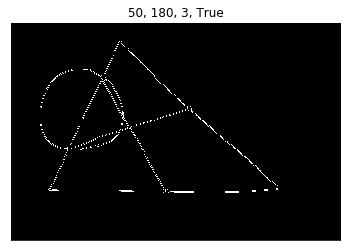

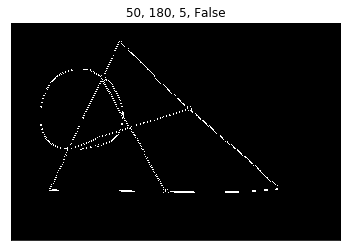

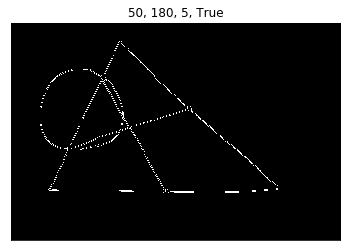

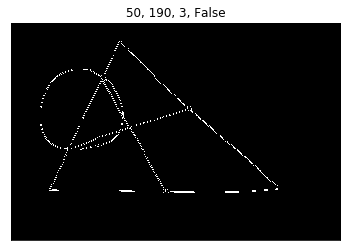

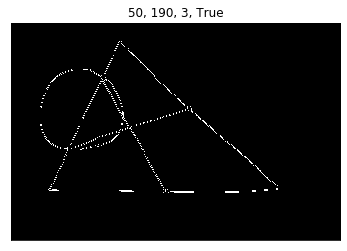

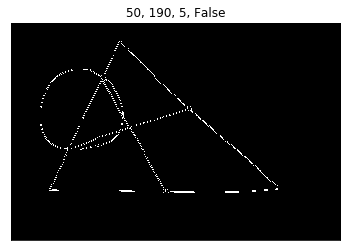

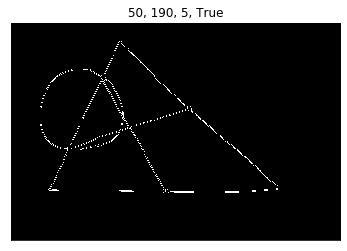

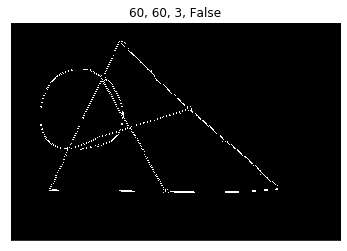

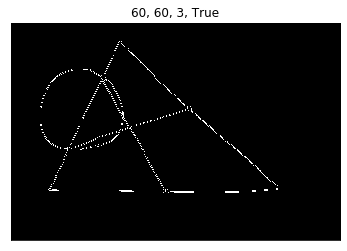

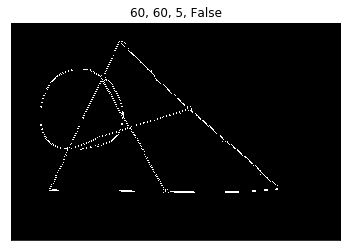

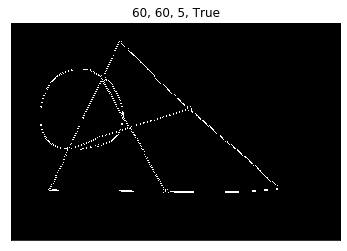

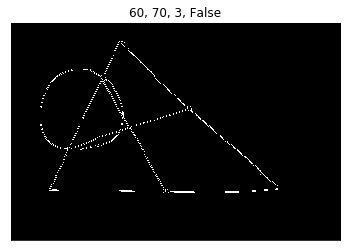

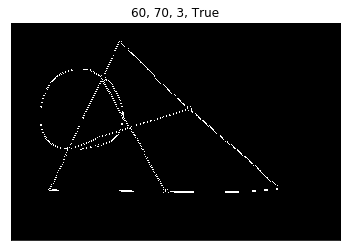

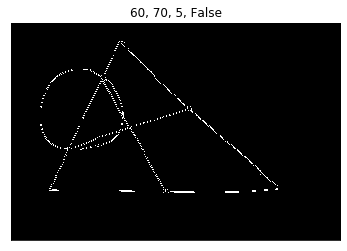

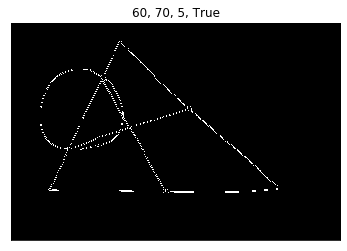

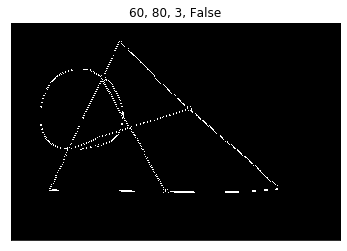

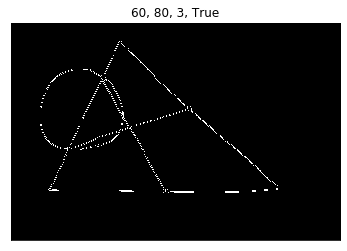

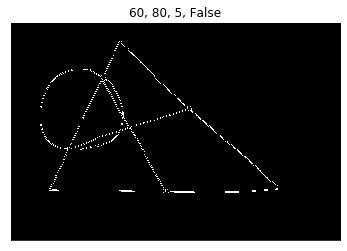

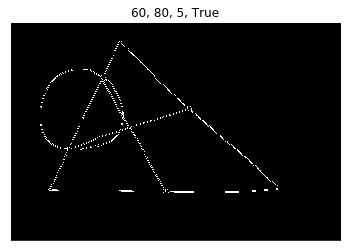

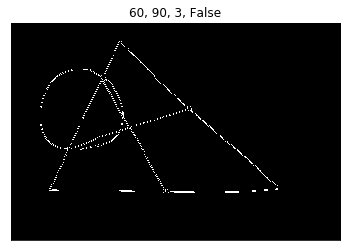

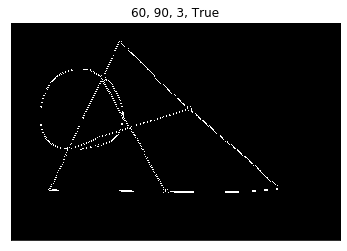

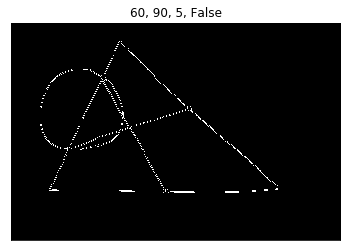

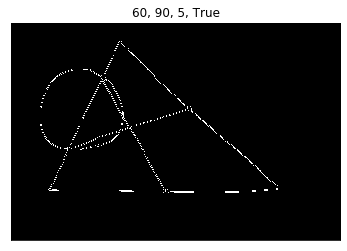

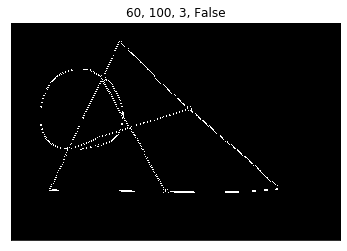

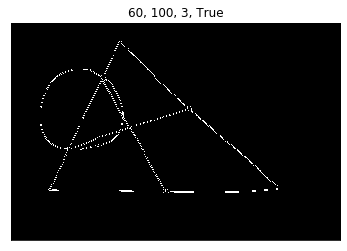

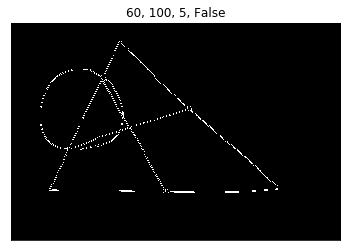

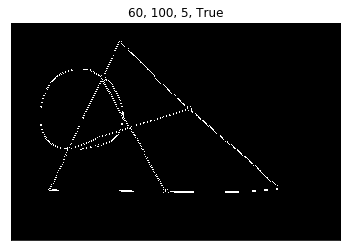

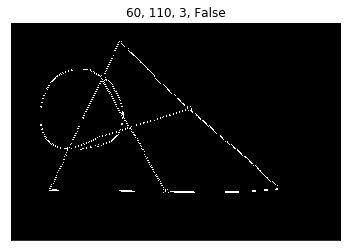

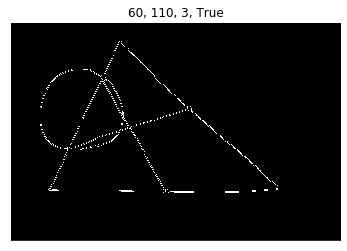

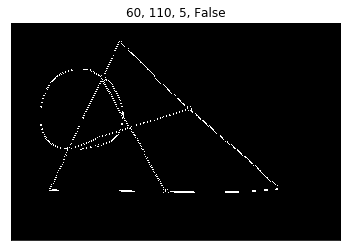

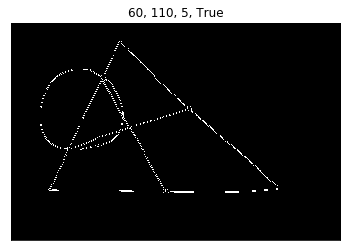

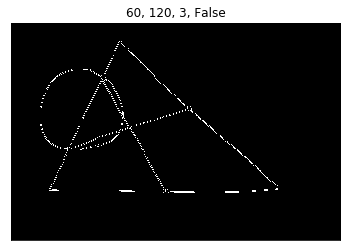

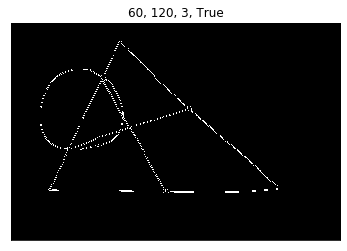

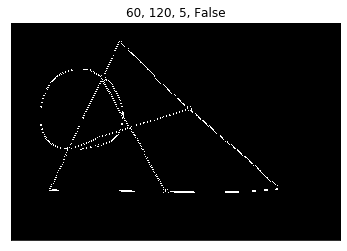

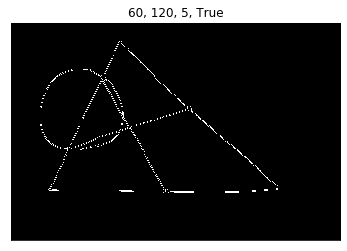

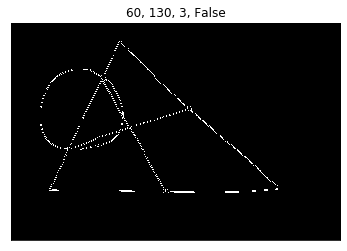

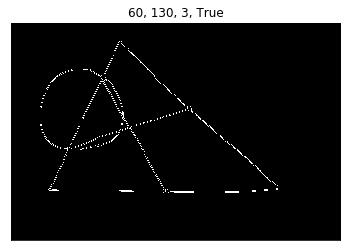

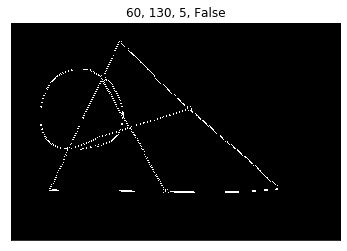

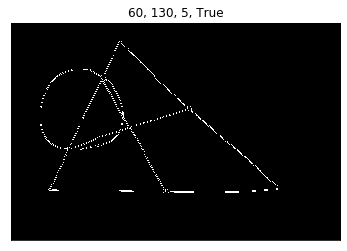

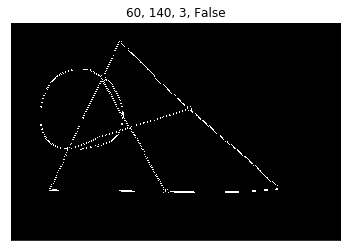

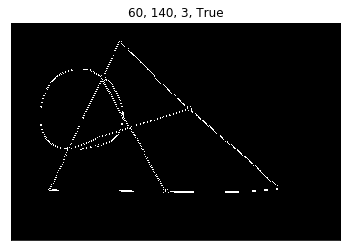

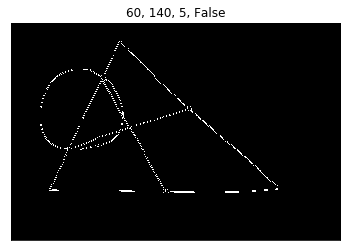

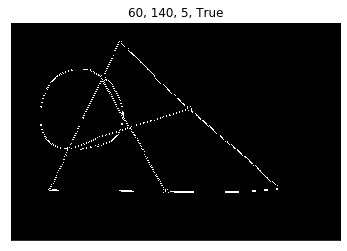

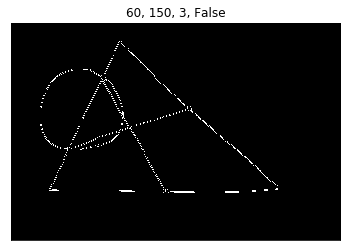

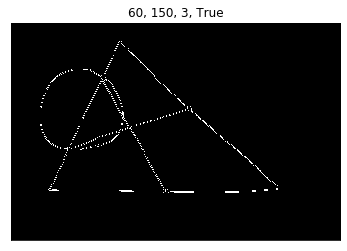

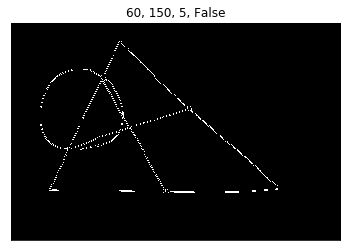

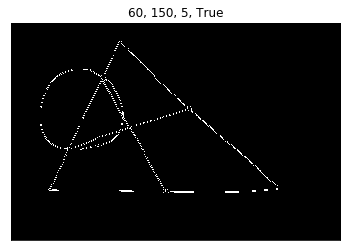

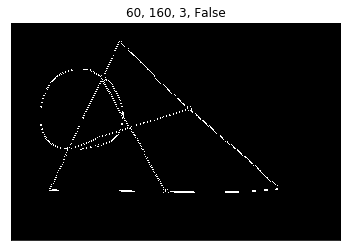

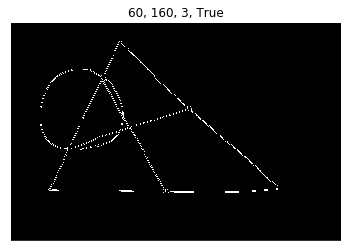

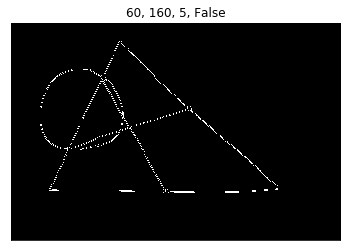

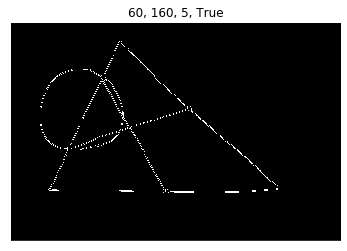

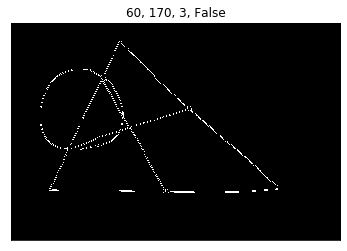

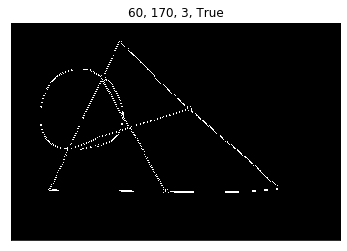

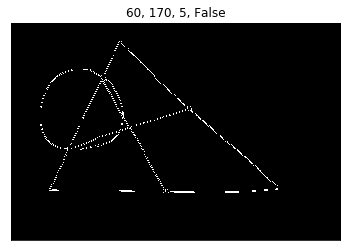

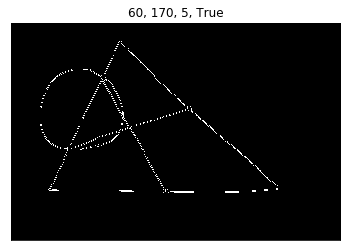

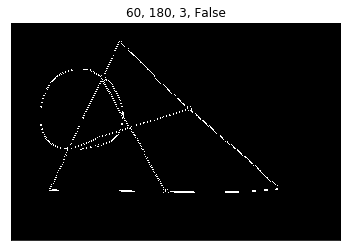

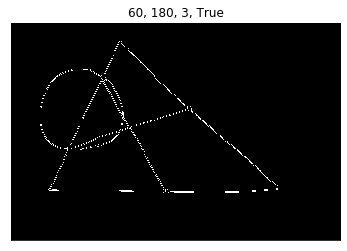

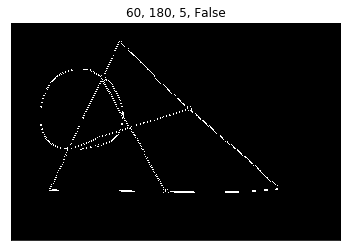

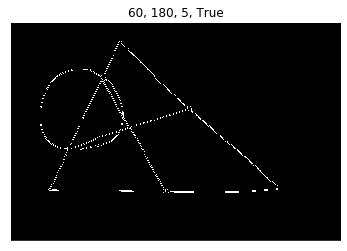

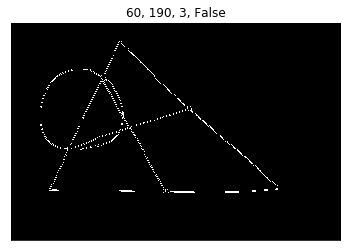

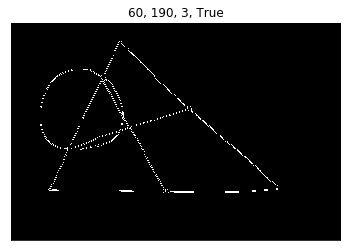

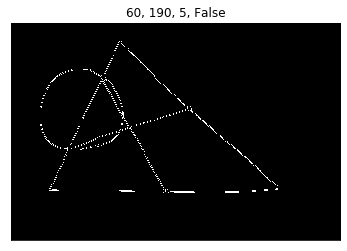

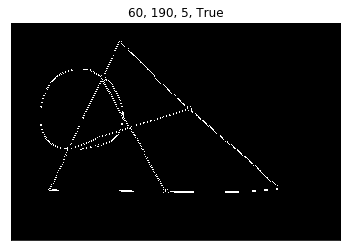

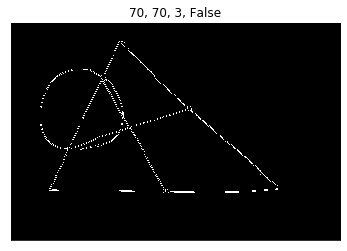

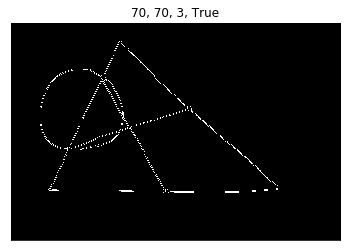

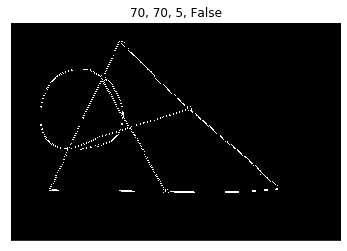

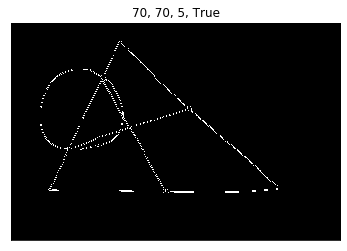

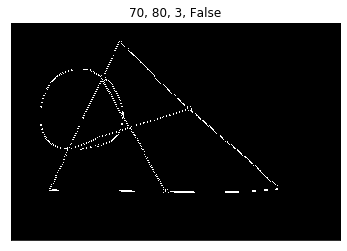

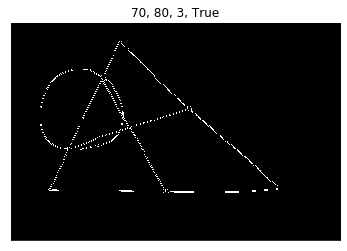

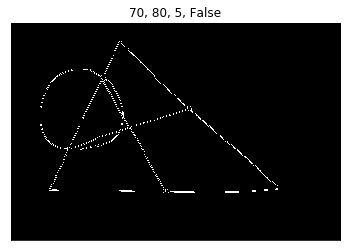

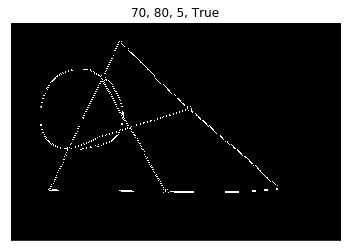

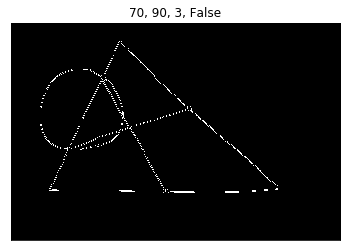

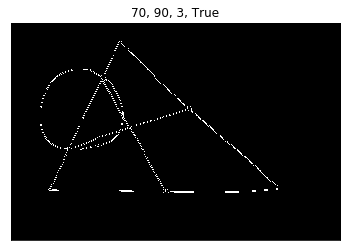

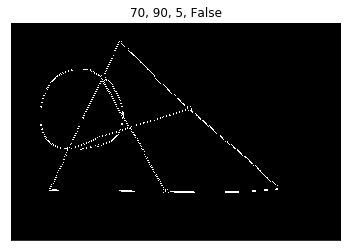

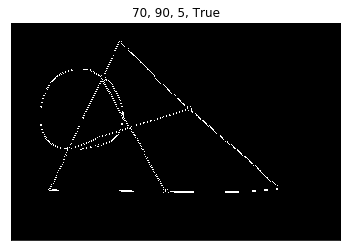

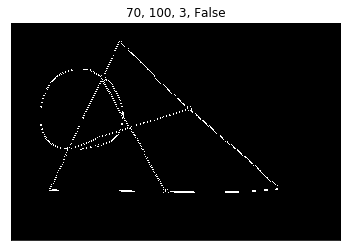

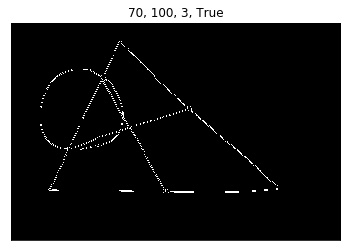

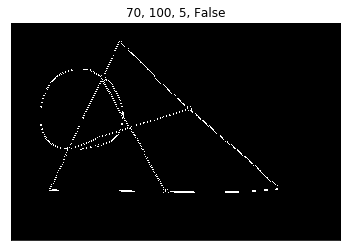

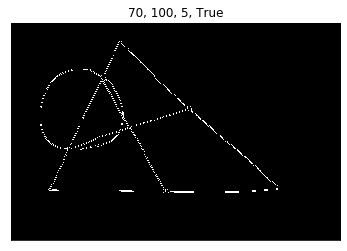

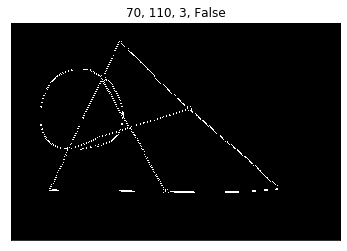

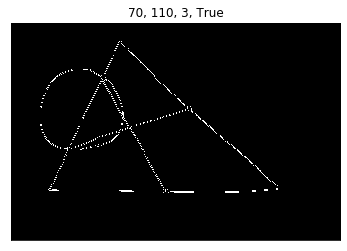

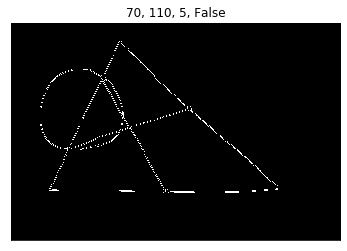

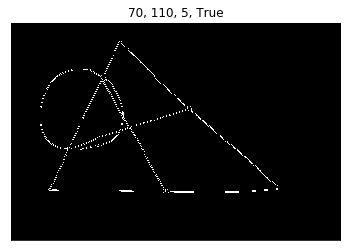

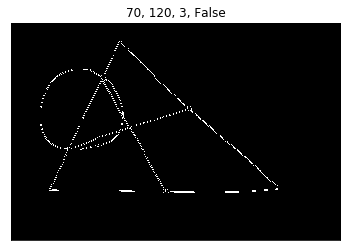

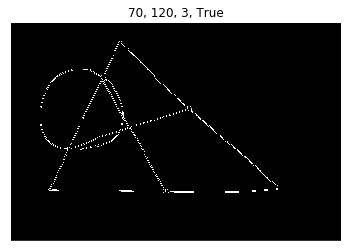

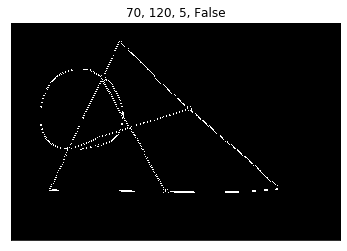

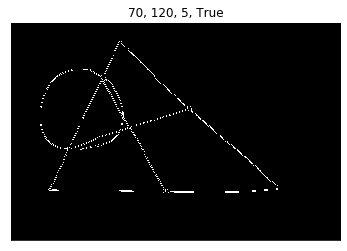

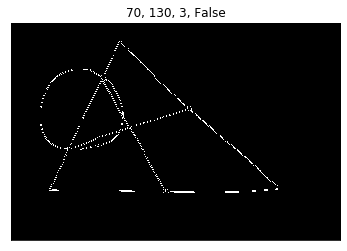

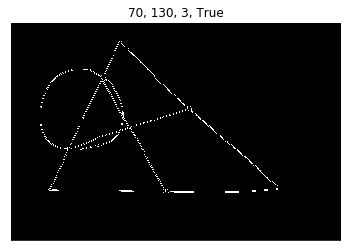

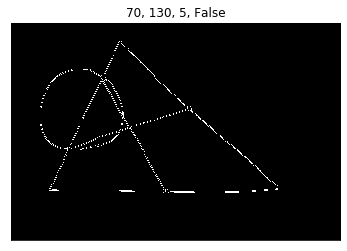

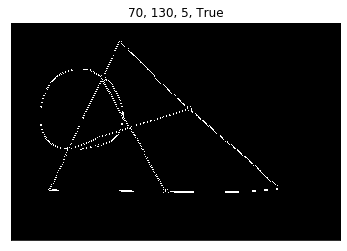

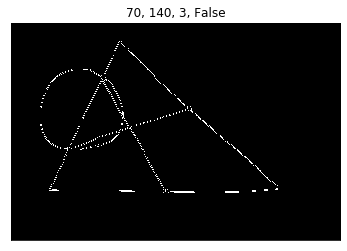

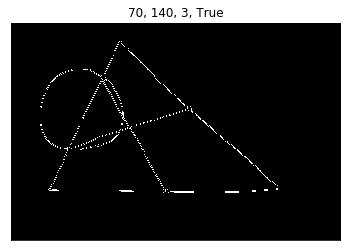

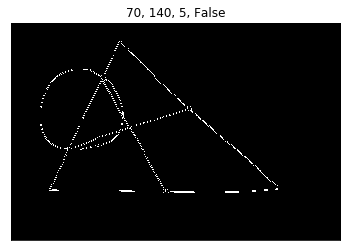

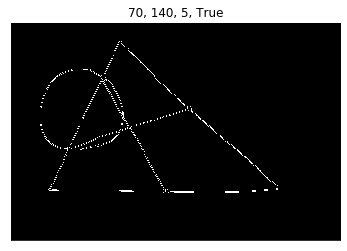

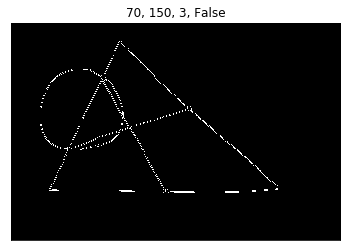

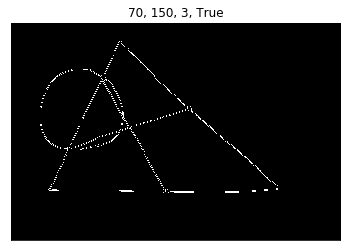

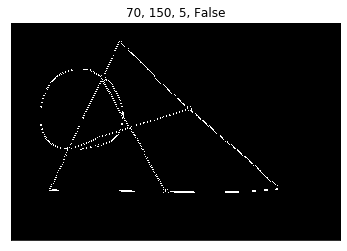

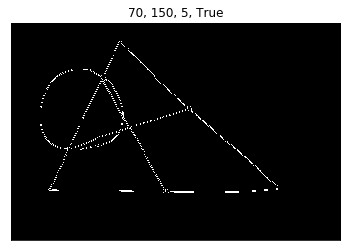

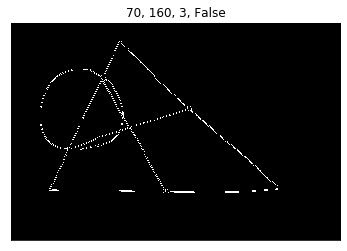

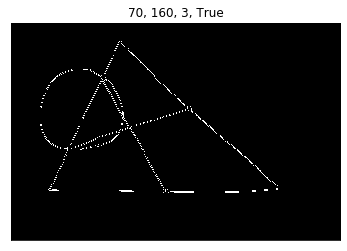

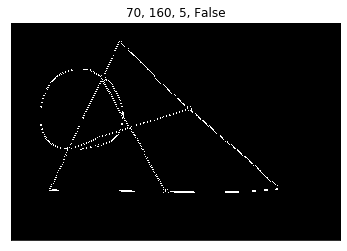

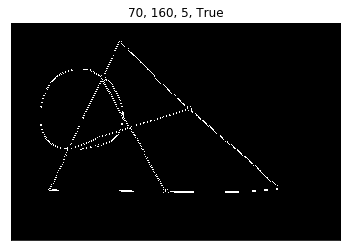

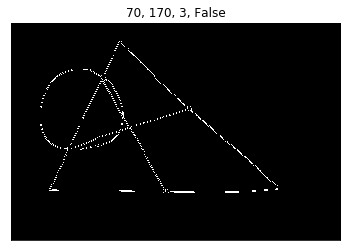

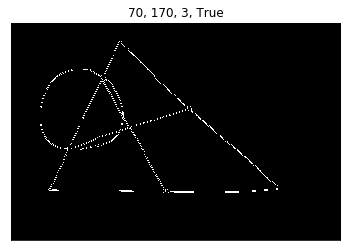

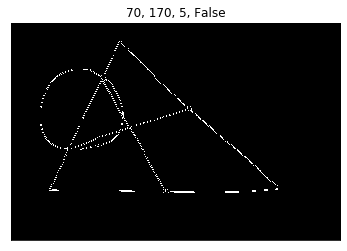

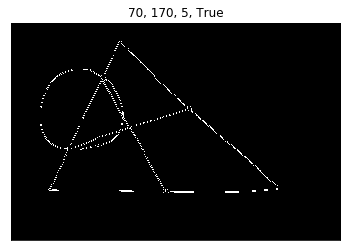

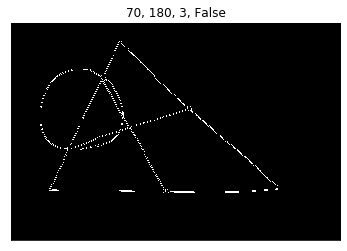

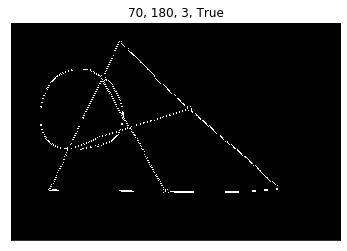

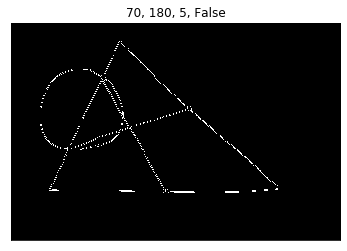

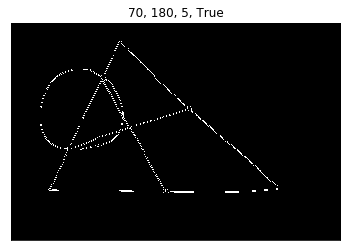

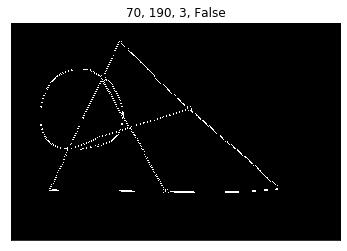

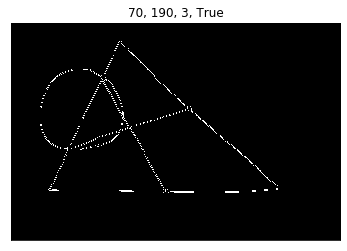

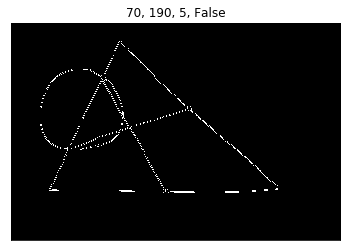

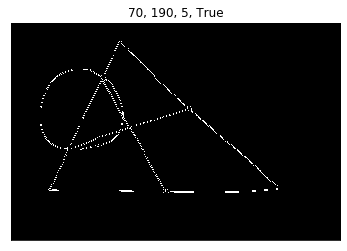

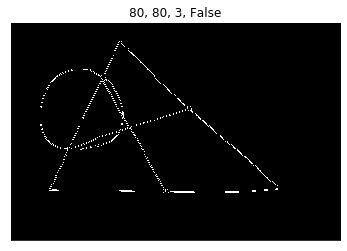

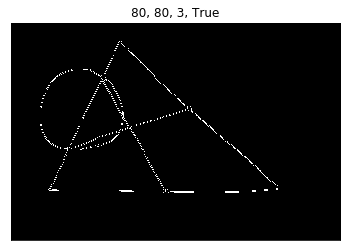

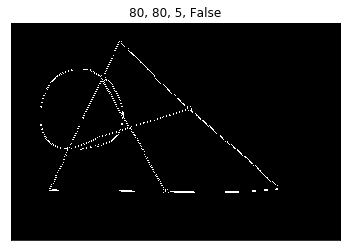

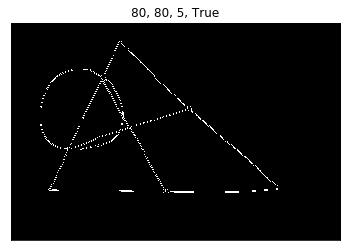

KeyboardInterrupt: 

In [96]:
for minVal in range (0, 100, 10):
    for maxVal in range (minVal, 200, 10):
        for aperture_size in range (3, 7, 2):
            for L2gradient in [False, True]:
                edges = cv2.Canny(img, minVal, maxVal, aperture_size, L2gradient=L2gradient)
                plt.imshow(edges, cmap = 'gray')
                plt.title(str(minVal) + ", " + str(maxVal) + ", " + str(aperture_size) + ", " + str(L2gradient)), plt.xticks([]), plt.yticks([])
                plt.show()